# KATASTROFA KLIMATYCZNA - EUROPA

**Cel: analiza danych dotyczących zmian średnich temperatur w Europie**

Dane:  [https://www.kaggle.com/datasets/sevgisarac/temperature-change](https://www.kaggle.com/datasets/sevgisarac/temperature-change)

## Struktura zbioru danych

Dane GISS Surface Temperature Analysis (GISTEMP v4) dostarcza NASA-GISS.
NASA opiera globalną analizę temperatury na danych zebranych przez stacje pogodowe, antarktyczne stacje badawcze oraz satelity.

- średnie  zmiany  temperatury powierzchni w odniesieniu do okresu bazowego
- okres bazowy: NASA wykorzystuje okres 1951-1980 jako punkt odniesienia, obejmujący wzorce klimatyczne oraz naturalne wahania temperatury na Ziemi w celu zrozumienia zmian globalnej temperatury w czasie
- jednostka miary: stopnie Celsjusza (°C)
- częstotliwość pomiarów: miesięczna, sezonowa, roczna,
- obszar referencyjny dotyczy wszystkich krajów i terytoriów świata: 190 krajów i 37 innych jednostek terytorialnych
- zakres czasowy analizowanych pomiarów: 1961-2019

## **Import wymaganych pakietów, załadowanie zestawu danych.**

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\toawe\projekt_python\archive\Environment_Temperature_change.csv',  encoding='cp1252')

In [2]:
df.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


## Przygotowanie zbioru danych do eksploracji

In [3]:
# Na potrzeby analizy uwzględniamy tylko dane dotyczące średnich zmian temperatury
df = df.loc[df['Element'] == 'Temperature change']
df.head() 

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,2,Afghanistan,7004,April,7271,Temperature change,°C,-1.709,0.117,0.919,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,2,Afghanistan,7005,May,7271,Temperature change,°C,1.412,-0.092,-0.690,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647


In [4]:
# Usuniecie zbędnych kolumn
df.drop(['Area Code', 'Months Code', 'Element Code', 'Element', 'Unit'], axis=1, inplace=True) 

In [5]:
df.head()

,Area,Months,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,Afghanistan,February,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,Afghanistan,March,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,Afghanistan,April,-1.709,0.117,0.919,-0.533,-1.816,-1.192,-1.496,-0.590,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,Afghanistan,May,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,-1.307,-1.841,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647


In [6]:
# wprowadzenie nazw dla pór roku
df.replace(to_replace=r'Dec–Jan–Feb', value='Winter', regex=True, inplace=True)
df.replace(to_replace=r'Mar–Apr–May', value='Spring', regex=True, inplace=True)
df.replace(to_replace=r'Jun–Jul–Aug', value='Summer', regex=True, inplace=True)
df.replace(to_replace=r'Sep–Oct–Nov', value='Autumn', regex=True, inplace=True)

In [7]:
df.head()

,Area,Months,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,Afghanistan,February,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,Afghanistan,March,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,Afghanistan,April,-1.709,0.117,0.919,-0.533,-1.816,-1.192,-1.496,-0.590,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,Afghanistan,May,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,-1.307,-1.841,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647


In [8]:
# usunięcie literki Y w nazwach kolumn dotyczacych lat
df.columns = df.columns.str.replace('Y', '') 

In [9]:
df.head()

,Area,Months,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,January,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,Afghanistan,February,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,Afghanistan,March,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,Afghanistan,April,-1.709,0.117,0.919,-0.533,-1.816,-1.192,-1.496,-0.590,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,Afghanistan,May,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,-1.307,-1.841,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647


In [10]:
# kopia df (tak na wszeli wypadek;)
df_copy = df.copy()

## ROK METEOROLOGICZNY - EUROPA VS. UNIA EUROPEJSKA VS. ŚWIAT

In [11]:
# ŚWIAT
w = df[(df['Area']=='World') & (df['Months']=='Meteorological year')] # wybór zmian temperatury dla roku meteo dla całego Świata
w_p = w.melt(id_vars=['Area', 'Months'], var_name='Year', value_name='Temp_change') #zmiana architektury tabelki
w_p.head()

,Area,Months,Year,Temp_change
0,World,Meteorological year,1961,0.207
1,World,Meteorological year,1962,0.034
2,World,Meteorological year,1963,0.159
3,World,Meteorological year,1964,-0.253
4,World,Meteorological year,1965,-0.226


In [12]:
#podstawowa statystyka dla Świata
from scipy.stats import iqr 
print('Statystyka dla Świata:\n', w_p.describe(), '\n\nIQR dla Świata:',(round(iqr(w_p.to_numpy()[:,-1]),2)))

Statystyka dla Świata:
        Temp_change
count    59.000000
mean      0.523542
std       0.513977
min      -0.311000
25%       0.136500
50%       0.439000
75%       0.952500
max       1.674000 

IQR dla Świata: 0.82


In [13]:
# obszr krajów Unii Europejskiej
eu = df[df['Area']=='European Union']
eu  = eu[eu['Months']=='Meteorological year']
eu_p = eu.melt(id_vars=['Area', 'Months'], var_name='Year', value_name='Temp_change')
eu_p.head()

,Area,Months,Year,Temp_change
0,European Union,Meteorological year,1961,1.039
1,European Union,Meteorological year,1962,-0.241
2,European Union,Meteorological year,1963,-0.576
3,European Union,Meteorological year,1964,-0.032
4,European Union,Meteorological year,1965,-0.518


In [14]:
#podstawowa statystyka dla dla UE
print('Statystyka dla UE:\n', eu_p.describe(), '\n\nIGR dla UE:',(round(iqr(eu_p.to_numpy()[:,-1]),2)))

Statystyka dla UE:
        Temp_change
count    59.000000
mean      0.618356
std       0.738804
min      -0.576000
25%      -0.016500
50%       0.719000
75%       1.173000
max       2.057000 

IGR dla UE: 1.19


In [15]:
# EUROPA rok meteorologiczny
e = df[(df['Area']=='Europe') & (df['Months']=='Meteorological year')]
e_p = e.melt(id_vars=['Area', 'Months'], var_name='Year', value_name='Temp_change')#zmiana architektury tabelki
e_p.head()

,Area,Months,Year,Temp_change
0,Europe,Meteorological year,1961,0.874
1,Europe,Meteorological year,1962,0.300
2,Europe,Meteorological year,1963,0.103
3,Europe,Meteorological year,1964,-0.523
4,Europe,Meteorological year,1965,-0.430


In [16]:
#sprawdzenie braków
e_p.isnull().sum().sum()

0

In [17]:
#podstawowa statystyka dla zmianay tem dla Europy 
e_p.describe()
print('Statystyka dla UE:\n', eu_p.describe(),'\n\nIGR dla Europy wynosi:', round(iqr(e.to_numpy()[:,2:]),2))

Statystyka dla UE:
        Temp_change
count    59.000000
mean      0.618356
std       0.738804
min      -0.576000
25%      -0.016500
50%       0.719000
75%       1.173000
max       2.057000 

IGR dla Europy wynosi: 1.1


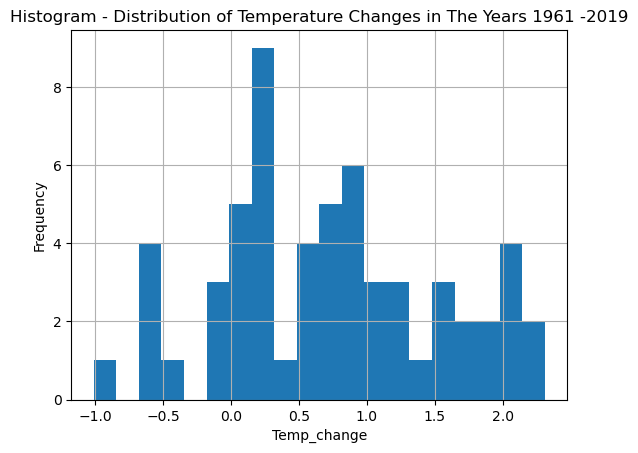

In [18]:
# rozkład danych - histogram zmiany temperaury w Europie
e_p.hist(bins=20)
plt.xlabel('Temp_change')
plt.ylabel('Frequency')
plt.title('Histogram - Distribution of Temperature Changes in The Years 1961 -2019')
plt.show()

<AxesSubplot:xlabel='Temp_change', ylabel='Count'>

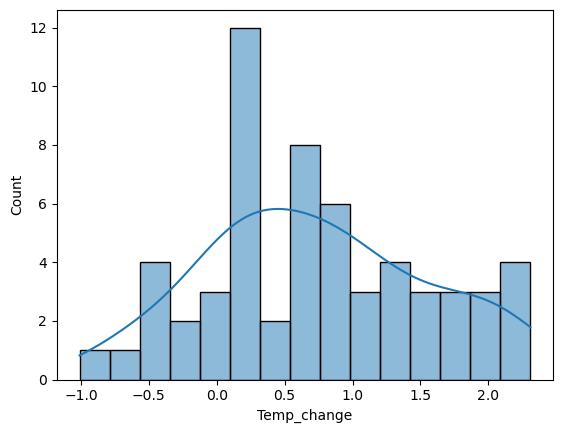

In [19]:
# rozkład danych + krzywa gęstości prawdopodobieństrwa dla zmiany temperaury w Europie
sns.histplot(data=e_p, x='Temp_change',bins=15, kde=True)

Text(0.5, 1.0, 'The distribution of Temperature Changes in The Years 1961 -2019')

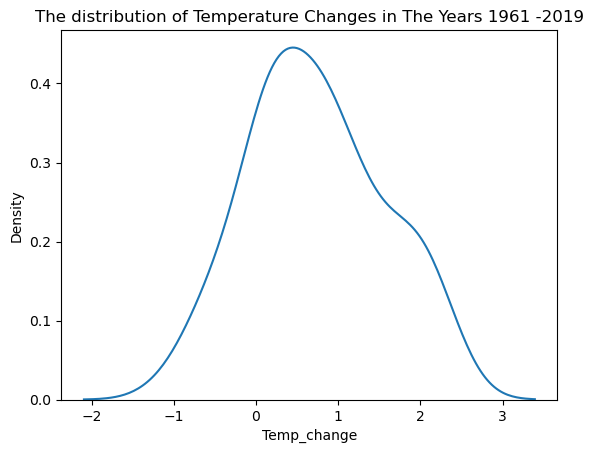

In [20]:
sns.kdeplot(data=e_p,  x="Temp_change") # rozkład danych - wykres KDE dla Europy
plt.title('The distribution of Temperature Changes in The Years 1961 -2019')

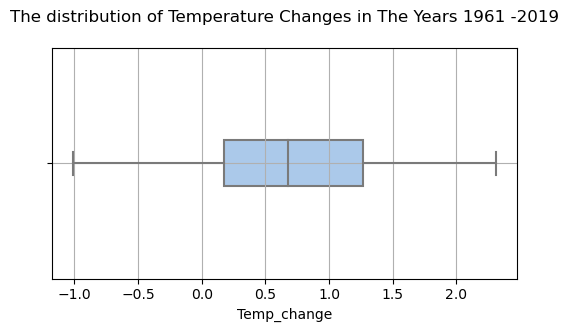



IGR dla Europy wynosi: 1.1


In [21]:
# prezentacja rokładu danych przez kwartyle - boxplot dla Europy
fig = plt.subplots(figsize=(6,3))
sns.boxplot(x=e_p['Temp_change'], palette="pastel", width=0.2)

plt.grid(True)
plt.title('The distribution of Temperature Changes in The Years 1961 -2019\n')
plt.show()

from scipy.stats import iqr # iqr - rozstęp międzykwartylowy dla Europy
X = e.to_numpy()[:,2:]
print('\n\nIGR dla Europy wynosi:', round(iqr(X),2))

Wizualizacja rozkładu danych pokazuje, iż w przypadku połowy obserwacji temperatura wzrosla o 1 stopień. 

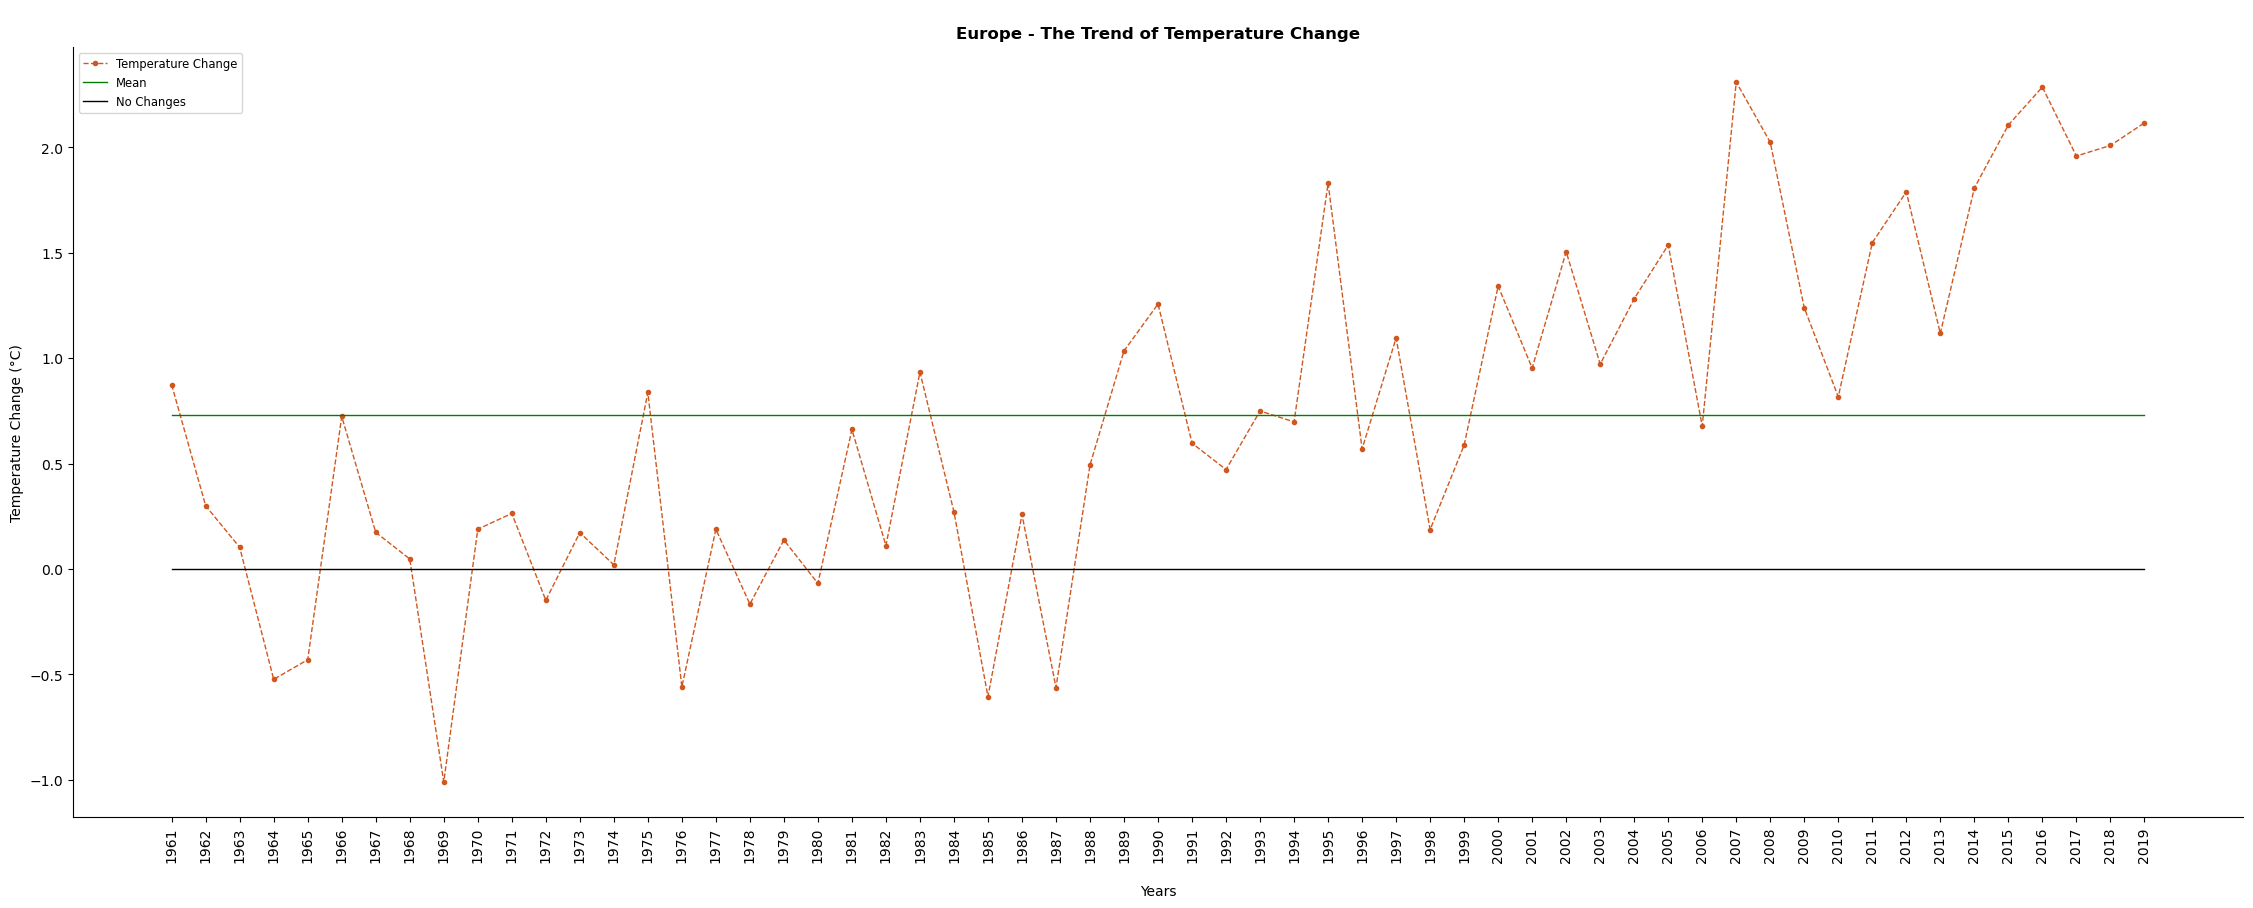

In [22]:
# trend rocznych zmian temperaruty powierzchni Europy na przestrzeni lat vs. średnia zniama tem z badanego okresu
x = e_p['Year']
y = e_p['Temp_change']

e_p['Mean'] = y.mean() # dodanie kolumny ze srednią na potrzeby wykresu
e_p['0°C'] = 0

m = e_p['Mean'] #średnia do wykresu
z = e_p['0°C'] #'0°C' do wykresu

fig, ax = plt.subplots(figsize=(28,10))

ax.plot(x, y,'.--', color='#d1571f', linewidth=1, label='Temperature Change')
ax.plot(x, m, color='green', linewidth=1, label='Mean')
ax.plot(x, z, color='black', linewidth=1, label='No Changes')

plt.xticks(rotation=90)

ax.spines['right'].set_visible(False) #usuiecie prawej osi ramki
ax.spines['top'].set_visible(False) #usuniecie gorenj osi ramki

title = ax.set_title('\nEurope - The Trend of Temperature Change',weight='bold')
plt.ylabel("Temperature Change (°C)")
plt.xlabel("\nYears")
plt.legend(fontsize='small', loc='upper left')
plt.show()

Wykres przedstawia trend zmiany temperatury powierzchni Europy na przestrzeni 59 lat. Minimala zmiana tem a tymsamym najwiesza ochłodzneie wystaiło w roku 1969, natomiast masymaloan zmiana tem, czyli najwększe ocieplenie to rok 2007. Najmiejsze zmiany temp miajły miejsce w latach 60, 70 i 80. Jednak po roku 1989 (ostatnie 30 lat) odnotowano już tylko dodatnie zmiany temperatury, a więc wystapiło znaczne ocieplenie.

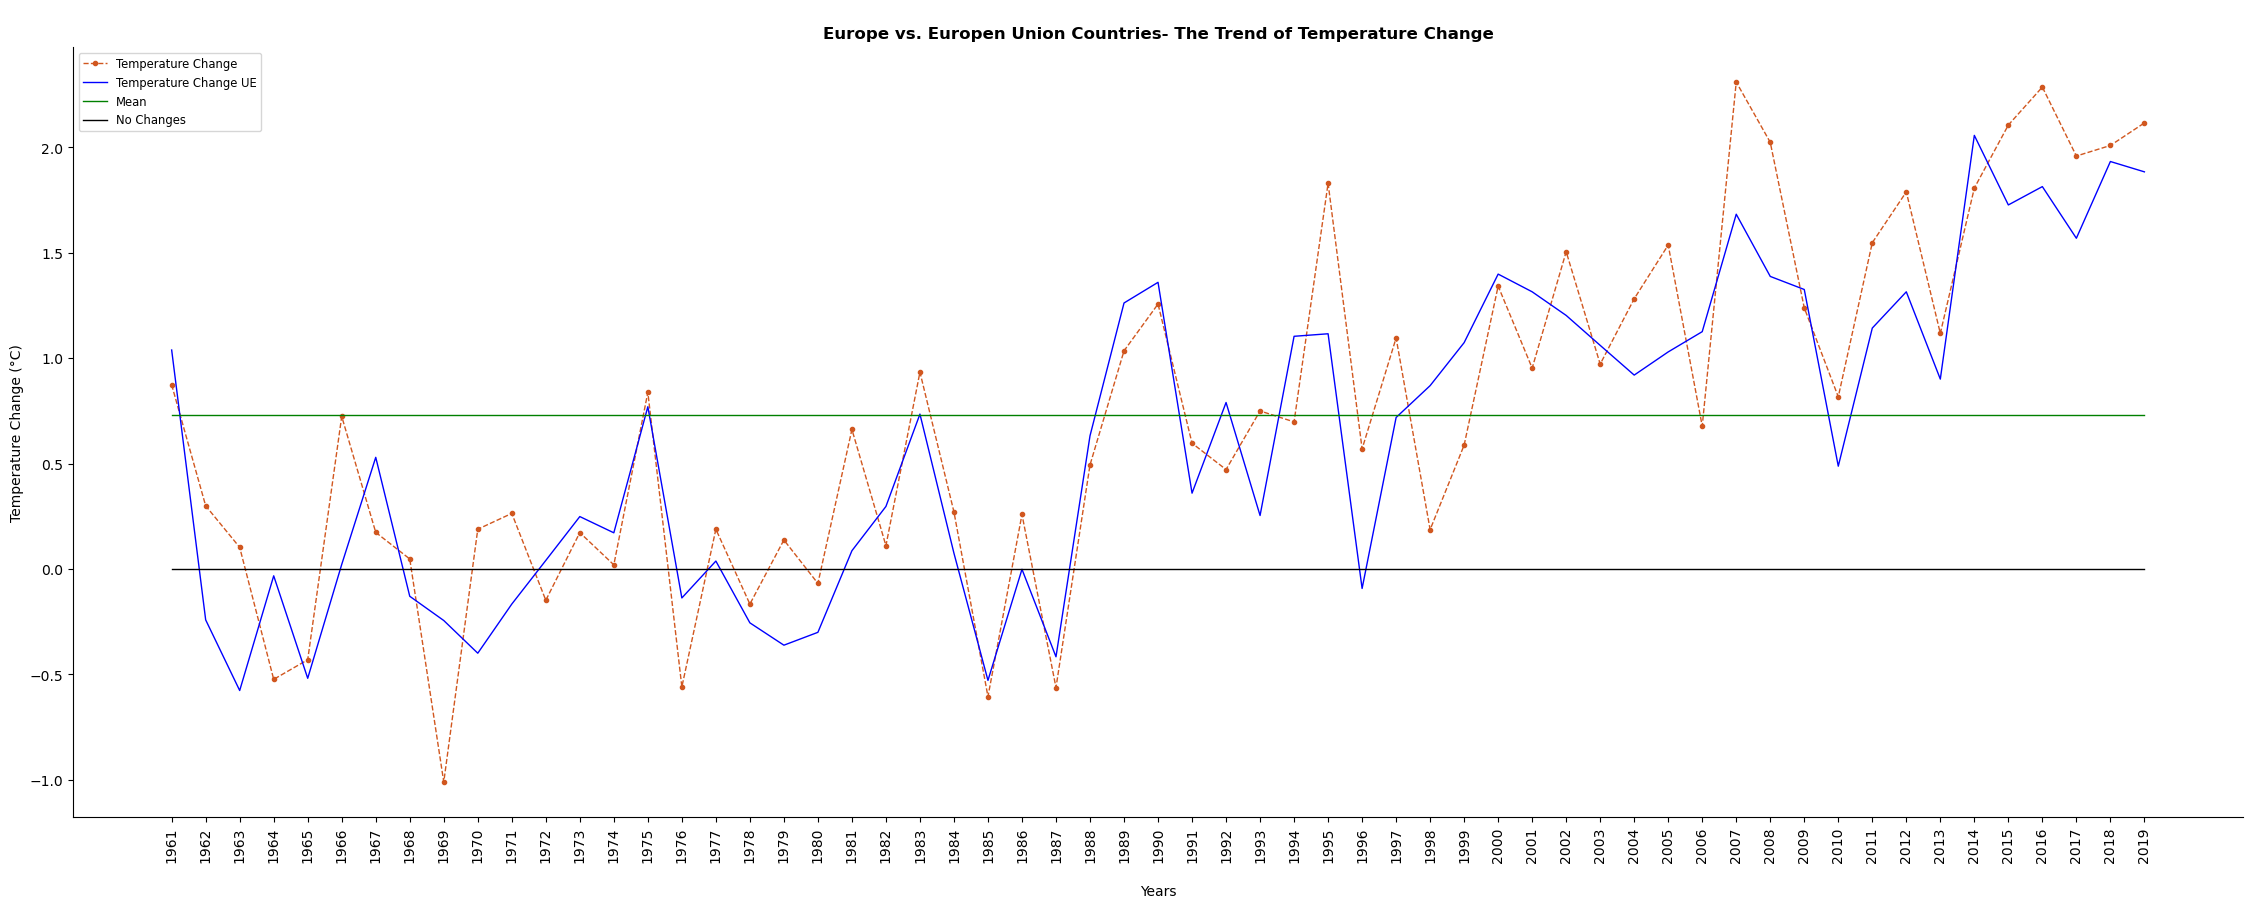

In [23]:
# trend rocznych zmian temperaruty powierzchni Europy na przestrzeni lat vs. średnia zniama tem z badanego okresu

x = e_p['Year']
y = e_p['Temp_change']
y1 = eu_p['Temp_change']

e_p['Mean'] = y.mean() # dodanie kolumny ze srednią na potrzeby wykresu
e_p['0°C'] = 0

m = e_p['Mean'] #średnia do wykresu
z = e_p['0°C'] #'0°C' do wykresu

fig, ax = plt.subplots(figsize=(28,10))

ax.plot(x, y,'.--', color='#d1571f', linewidth=1, label='Temperature Change')
ax.plot(x, y1,'-', color='blue', linewidth=1, label='Temperature Change UE')
ax.plot(x, m, color='green', linewidth=1, label='Mean')
ax.plot(x, z, color='black', linewidth=1, label='No Changes')

plt.xticks(rotation=90)

ax.spines['right'].set_visible(False) #usuiecie prawej osi ramki
ax.spines['top'].set_visible(False) #usuniecie gorenj osi ramki

title = ax.set_title('\nEurope vs. Europen Union Countries- The Trend of Temperature Change',weight='bold')
plt.ylabel("Temperature Change (°C)")
plt.xlabel("\nYears")
plt.legend(fontsize='small', loc='upper left')
plt.show()

Na terenie państw UE zmiana temperatury jest łagodniejsza niż w całej Europie.

In [24]:
#wzrost średnich temperatur
wzrost = round(sum(e_p['Temp_change']>0)/e_p['Temp_change'].size*100)
print(f"Ilość ociepleń: {sum(e_p['Temp_change']>0)}, co stanowi: {wzrost} % przypadków.")

Ilość ociepleń: 50, co stanowi: 85 % przypadków.


In [25]:
#spadek średnich temperatur
spadek = round(sum(e_p['Temp_change']<0)/e_p['Temp_change'].size*100)
print(f"Ilość ochłodzeń: {sum(e_p['Temp_change']<0)}, co stanowi: {spadek} % przypadków.")

Ilość ochłodzeń: 9, co stanowi: 15 % przypadków.


85% rocznych średnich zmian temeratur jet wzrostowych, 15% jest malejaych.

In [26]:
# podział całego okresu obserwacji na kolejne dekaday: do roku 1969, do roku 1979 itd.

In [27]:
upto_y1969 = e_p[e_p['Year'] <= '1969']
upto_y1979 = e_p[(e_p['Year'] <= '1979') &  (e_p['Year'] > '1969')]
upto_y1989 = e_p[(e_p['Year'] <= '1989') &  (e_p['Year'] > '197')]
upto_y1999 = e_p[(e_p['Year'] <= '1999') &  (e_p['Year'] > '1989')]
upto_y2009 = e_p[(e_p['Year'] <= '2009') &  (e_p['Year'] > '1999')]
upto_y2019 = e_p[(e_p['Year'] <= '2019') &  (e_p['Year'] > '2009')]

In [28]:
# srednie zmiany temperatury w kolenych dekadach: do roku 1969, do roku 1979 itd.
years = [round(upto_y1969['Temp_change'].mean(),2), 
        round(upto_y1979['Temp_change'].mean(),2), 
        round(upto_y1989['Temp_change'].mean(),2), 
        round(upto_y1999['Temp_change'].mean(),2), 
        round(upto_y2009['Temp_change'].mean(),2), 
        round(upto_y2019['Temp_change'].mean(),2)]
years

[0.03, 0.09, 0.17, 0.8, 1.38, 1.76]

In [29]:
# utworzenie tabeli dla średniej zmiany teperatury w Europie dla kolejnych dekad
Y = pd.DataFrame(years)
Y.columns=['Average_of_10_years']
Y['Decade']= ['dec_1969','dec_1979','dec_1989', 'dec_1999', 'dec_2009', 'dec_2019']
Y

,Average_of_10_years,Decade
0,0.03,dec_1969
1,0.09,dec_1979
2,0.17,dec_1989
3,0.80,dec_1999
4,1.38,dec_2009
5,1.76,dec_2019


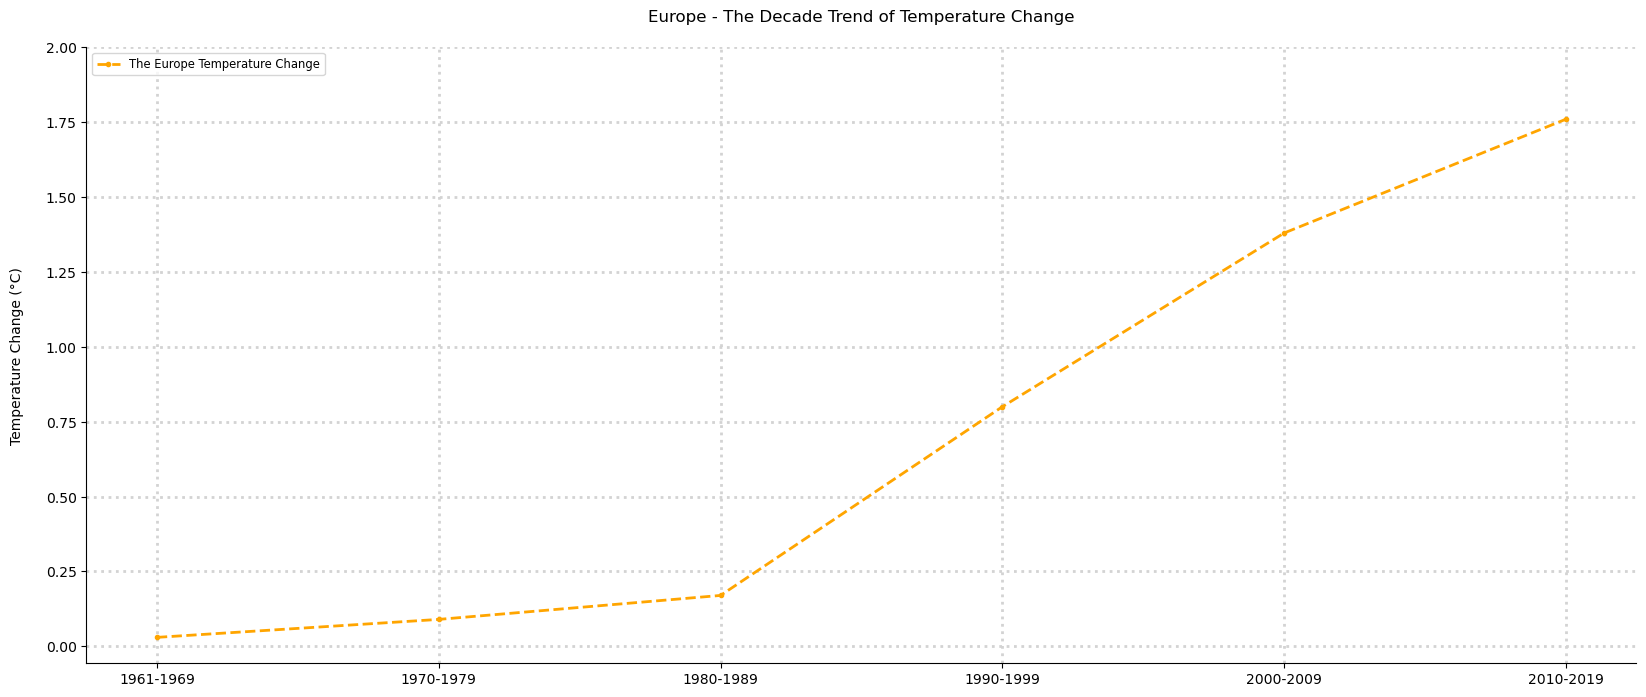

In [30]:
#wykres dla zmian temperatur w kolenych dekadach - Europa
fig, ax = plt.subplots(figsize=(20, 8))

plt.plot(Y['Decade'], Y['Average_of_10_years'], '.--', color='orange', label='The Europe Temperature Change', linewidth=2)

plt.xticks(Y['Decade'], ['1961-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019'])
plt.yticks(np.arange(0,2.25,0.25))
plt.legend(fontsize='small', loc='upper left')
ax.spines['right'].set_visible(False) #usuiecie prawej osi ramki
ax.spines['top'].set_visible(False) #usuniecie gorenj osi ramki

title = ax.set_title('Europe - The Decade Trend of Temperature Change\n')
plt.ylabel("Temperature Change (°C)\n")
plt.legend(fontsize='small', loc='upper left')
plt.grid(color ='lightgrey',linestyle=':', linewidth=2)
plt.show()

Gwałtowny wzrost temperatury powierzchni Europy dla ostatnich 30 lat.

## EUROPA - PORY ROKU

In [31]:
#pory roku dla Europy
seasons = ['Winter','Spring','Summer','Autumn']

e_seasons  = df[(df['Area']=='World') & (df['Months'].isin(seasons))]
e_seasons

,Area,Months,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
8422,World,Winter,0.439,0.035,0.168,-0.315,-0.296,0.500,-0.355,-0.338,...,0.997,0.628,0.733,0.909,0.929,1.509,2.165,1.649,1.431,1.426
8424,World,Spring,0.300,0.041,-0.088,-0.184,-0.329,0.102,-0.018,-0.015,...,1.460,1.035,1.280,1.065,1.372,1.444,1.999,1.591,1.435,1.708
8426,World,Summer,0.106,-0.084,0.082,-0.228,-0.191,0.236,-0.198,-0.209,...,1.190,1.046,1.146,0.972,0.998,1.250,1.359,1.265,1.161,1.308
8428,World,Autumn,-0.016,0.143,0.473,-0.284,-0.086,-0.033,0.114,0.083,...,1.267,0.983,1.163,1.136,0.910,1.471,1.172,1.254,1.178,1.451


In [32]:
#sprawdzenie braków
e_seasons.isnull().sum().sum()

0

In [33]:
#zmiana architektury tabelki
e_seasons_p = e_seasons.melt(id_vars=['Area', 'Months'], var_name='Year', value_name='Temp_change')
e_seasons_p.head()

,Area,Months,Year,Temp_change
0,World,Winter,1961,0.439
1,World,Spring,1961,0.300
2,World,Summer,1961,0.106
3,World,Autumn,1961,-0.016
4,World,Winter,1962,0.035


In [34]:
# roczne zmiany tem dla pór roku
winter = e_seasons_p[e_seasons_p['Months']=='Winter']
spring = e_seasons_p[e_seasons_p['Months']=='Spring']
summer = e_seasons_p[e_seasons_p['Months']=='Summer']
autumn = e_seasons_p[e_seasons_p['Months']=='Autumn']

In [35]:
# statystyka dla pór roku w Europie w formie tabelki
seasons_describe = pd.concat([winter.describe(),spring.describe(),summer.describe(),autumn.describe()], axis=1)
seasons_describe.columns=['Winter', 'Spring', 'Summer','Autumn']
seasons_describe

,Winter,Spring,Summer,Autumn
count,59.000000,59.000000,59.000000,59.000000
mean,0.548661,0.610949,0.463780,0.470356
std,0.613263,0.555606,0.472334,0.520665
min,-0.724000,-0.364000,-0.246000,-0.418000
25%,0.112500,0.189500,0.101500,-0.023500
50%,0.568000,0.532000,0.373000,0.345000
75%,0.939000,1.061500,0.844500,0.968500
max,2.165000,1.999000,1.359000,1.471000


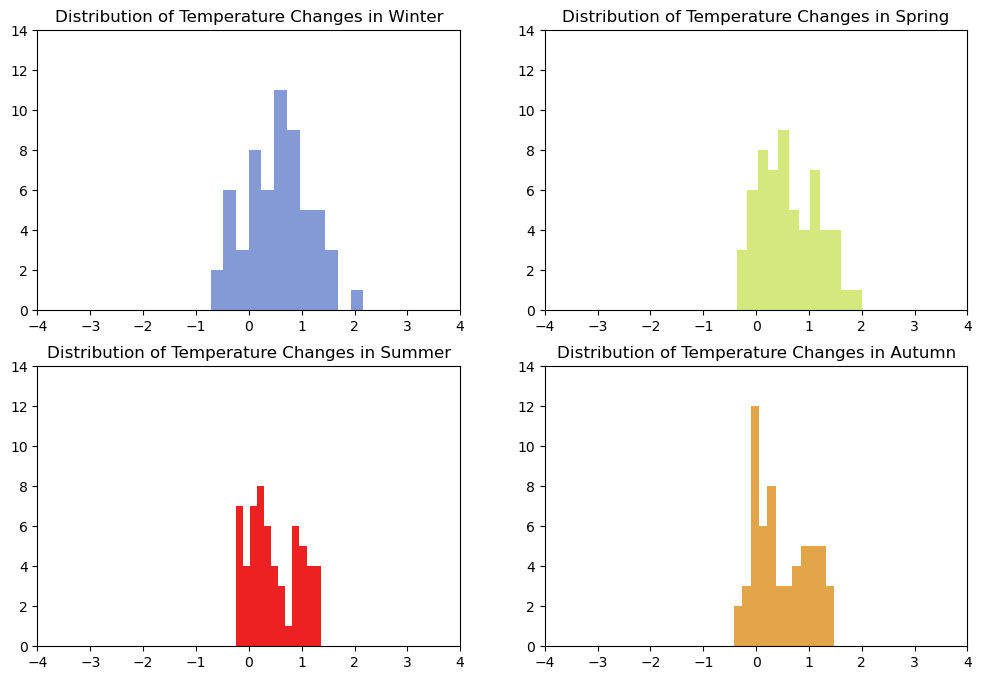

In [36]:
# rozkład danych - histogram zmian temperatur dla prór roku
w = winter.to_numpy()[:,-1]
s = spring.to_numpy()[:,-1]
su = summer.to_numpy()[:,-1]
a = autumn.to_numpy()[:,-1]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
xlim = (-4,4) #zakres osi x (dla ustalenia tej samej sklai porównawczej)
ylim = (0,14) #zakres osi y

axs[0, 0].hist(w, bins=12, color='#839ad6')
axs[0, 0].set_title('Distribution of Temperature Changes in Winter')
axs[0,0].set_xlim(xlim) #ustawienie zkresu dla osi wykresu
axs[0,0].set_ylim(ylim)


axs[1, 0].hist(su, bins=12, color='#ed2121')
axs[1, 0].set_title('Distribution of Temperature Changes in Summer')
axs[1, 0].set_xlim(xlim)
axs[1, 0].set_ylim(ylim)

axs[0, 1].hist(s, bins=12, color='#d4e87d')
axs[0, 1].set_title('Distribution of Temperature Changes in Spring')
axs[0, 1].set_xlim(xlim)
axs[0, 1].set_ylim(ylim)

axs[1, 1].hist(a, bins=12,color='#e3a549')
axs[1, 1].set_title('Distribution of Temperature Changes in Autumn')
axs[1, 1].set_xlim(xlim)
axs[1, 1].set_ylim(ylim)

plt.show()

Text(0.5, 1.0, 'Kernel Density Estimate - Temperature Changes for Seasons')

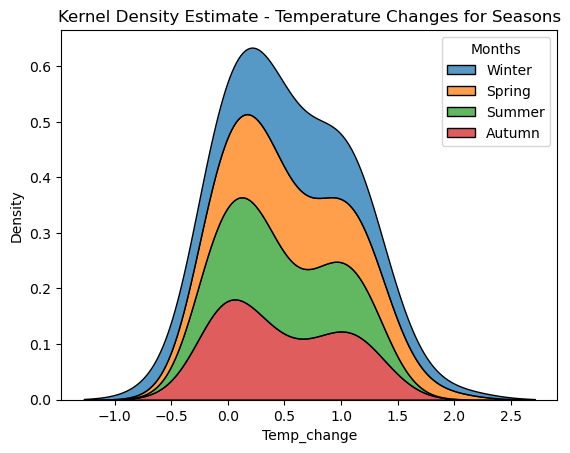

In [37]:
# rozkład danych - wykres KDE
sns.kdeplot(data=e_seasons_p, x="Temp_change", hue="Months", multiple="stack")
plt.title('Kernel Density Estimate - Temperature Changes for Seasons')

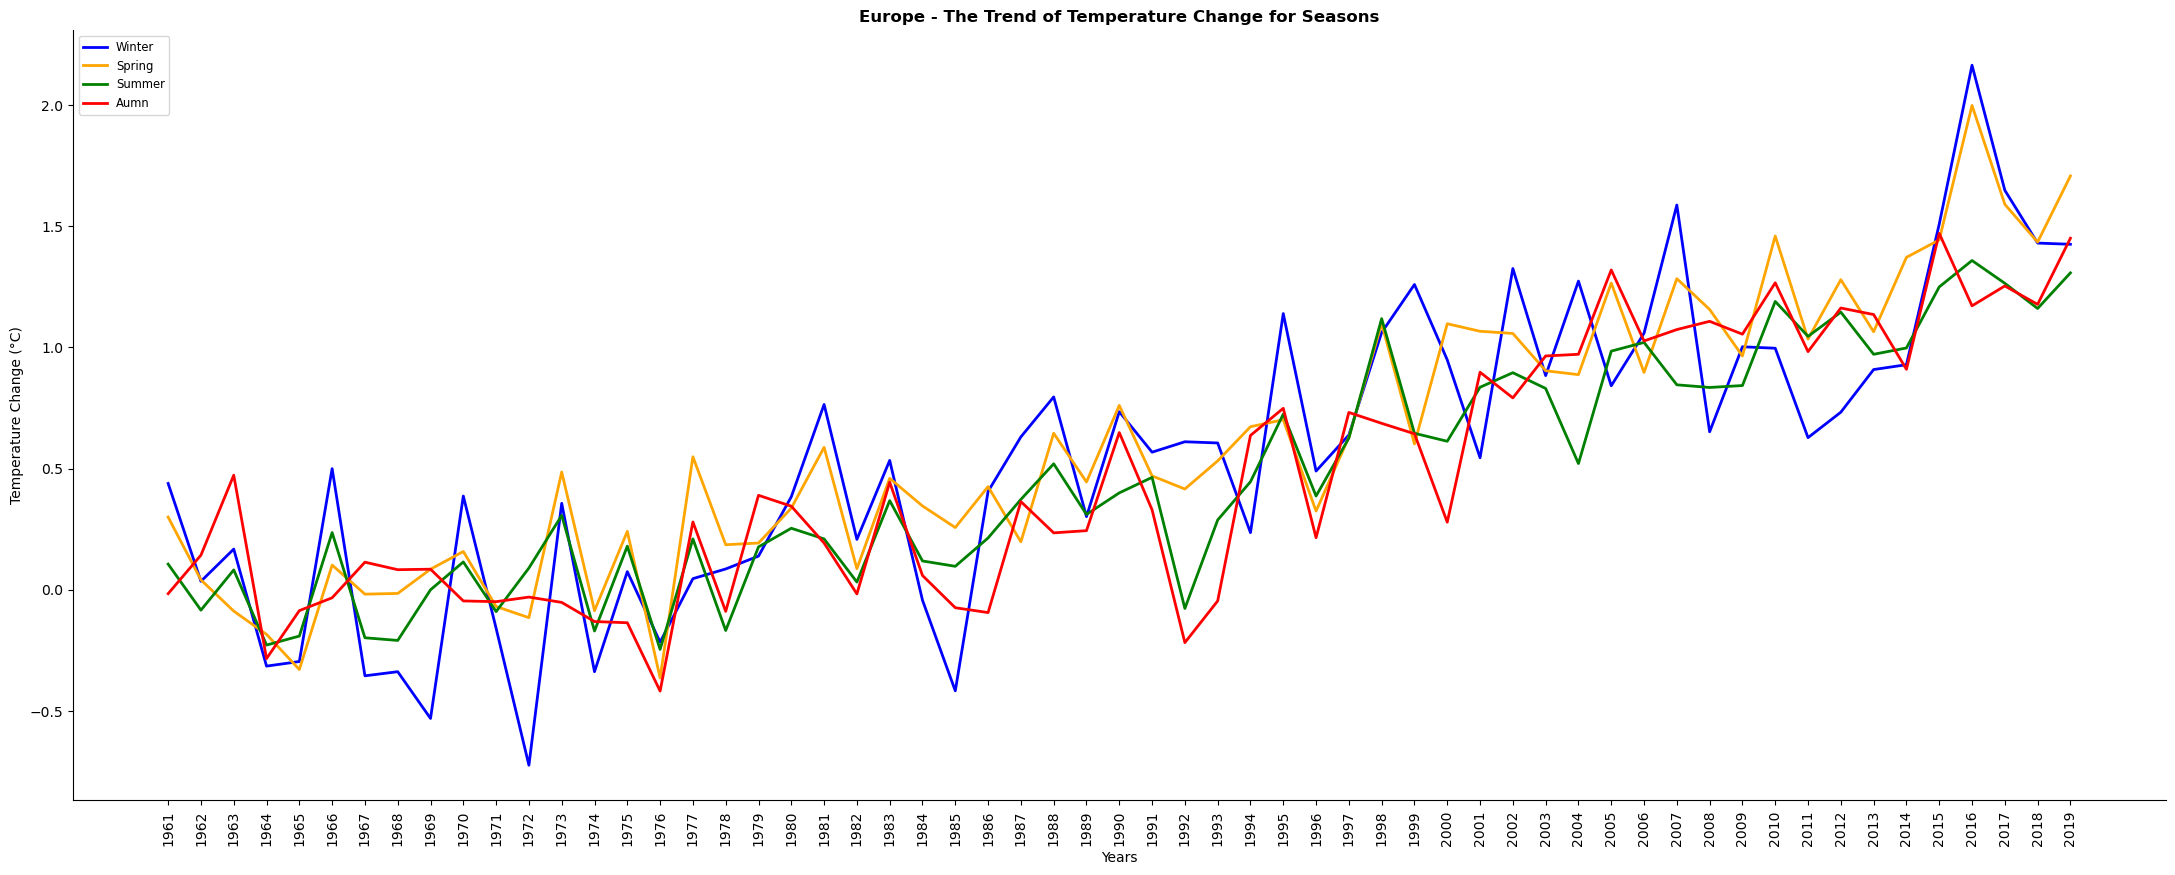

In [38]:
# trend rocznych zmian temperaruty powierzchni Europy na przestrzeni lat dla pór roku
fig, ax = plt.subplots(figsize=(27, 10))

plt.plot(winter['Year'], winter['Temp_change'], '-', color='blue', label='Winter', linewidth=2)
plt.plot(spring['Year'], spring['Temp_change'], '-', color='orange', label='Spring',linewidth=2)
plt.plot(summer['Year'], summer['Temp_change'], '-', color='green', label='Summer',linewidth=2)
plt.plot(autumn['Year'], autumn['Temp_change'], '-', color='red', label='Aumn',linewidth=2)

plt.xticks(rotation=90)
plt.legend(fontsize='small', loc='upper left')
plt.title('Europe - The Trend of Temperature Change for Seasons', weight='bold')
ax.spines['right'].set_visible(False) #usuiecie prawej osi ramki
ax.spines['top'].set_visible(False) #usuniecie gorenj osi ramki
plt.xlabel('Years')
plt.ylabel('Temperature Change (°C)')
plt.show()

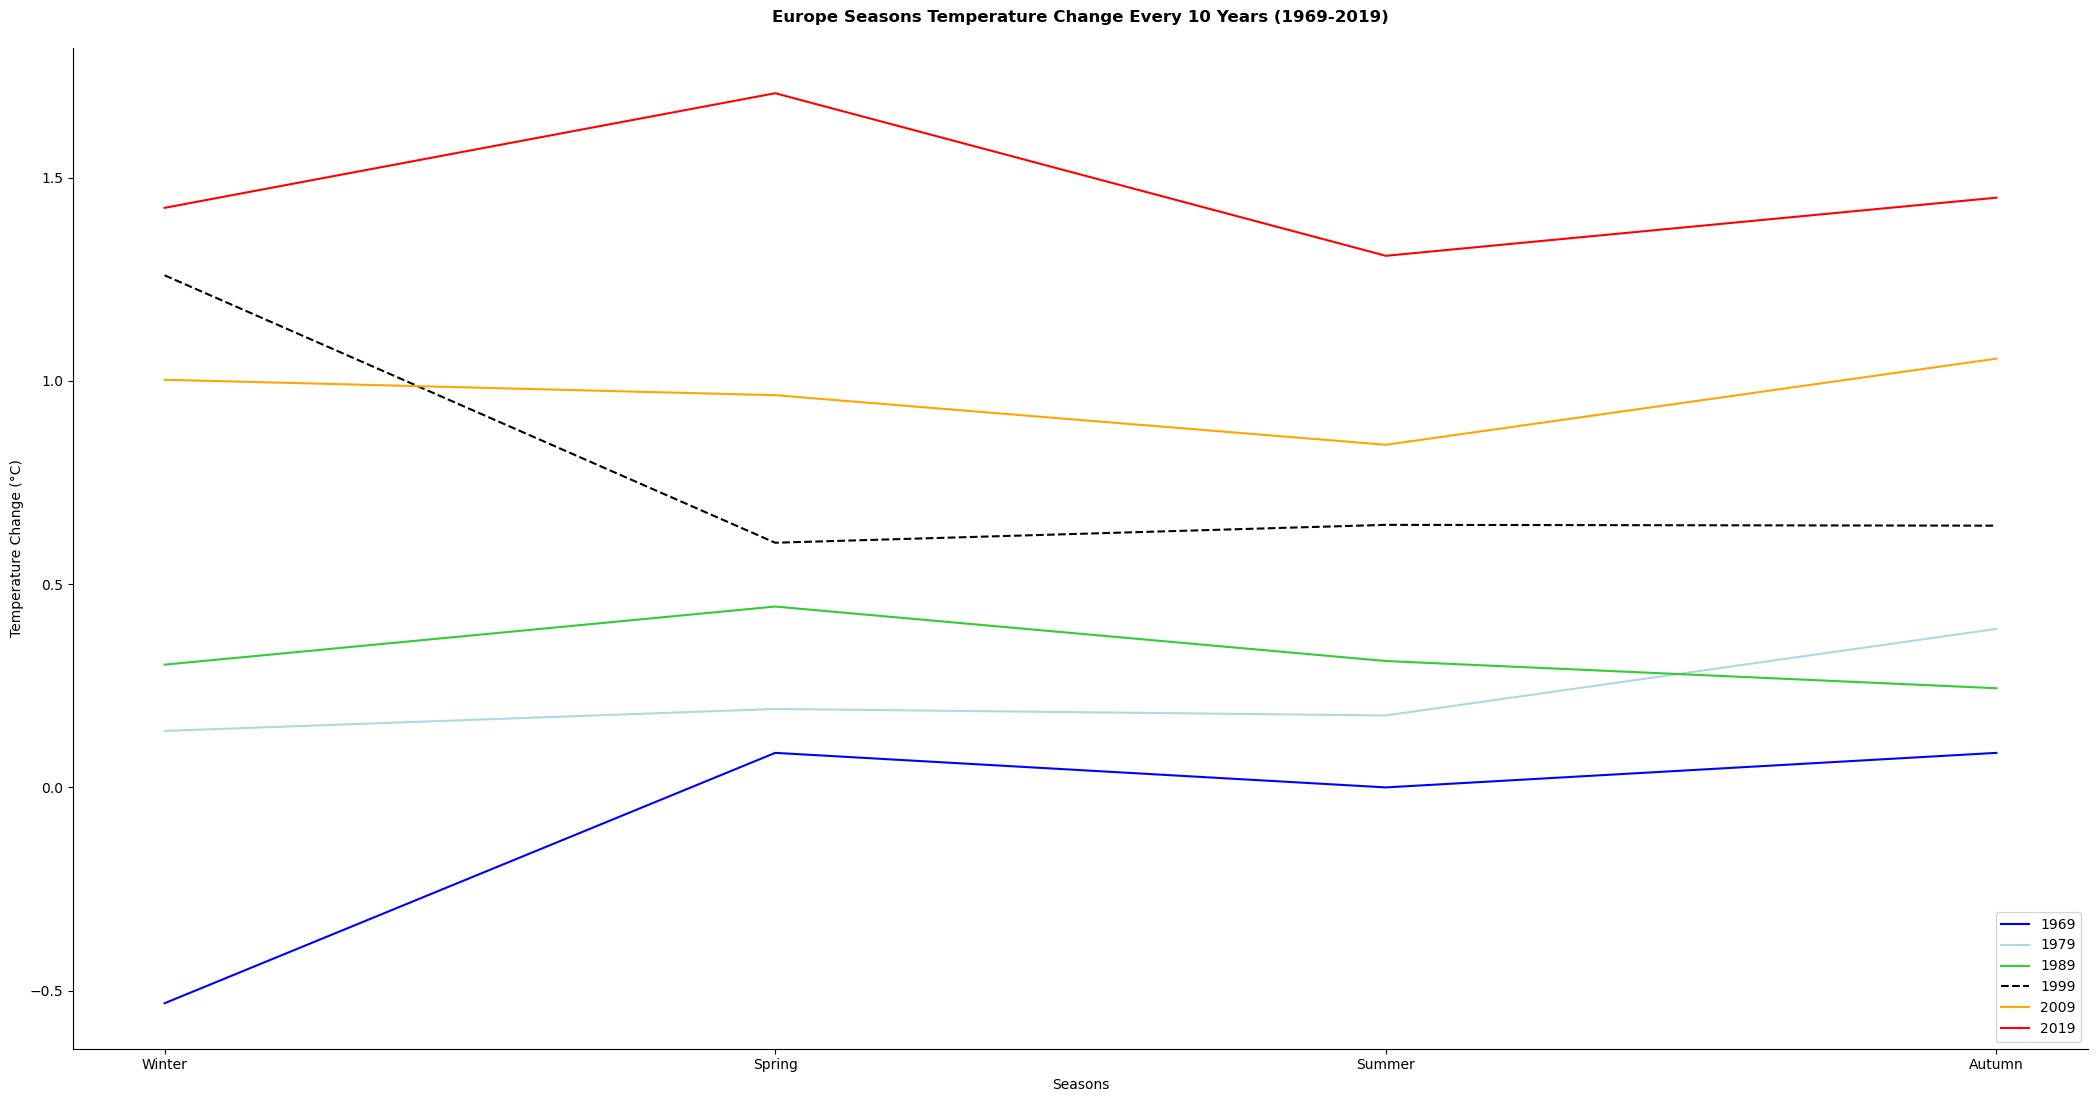

In [39]:
#Trend zmian temperatury w Europie dla pór roku w ciagu kolejnych 10 lat obserwacji
y1969 = e_seasons_p[e_seasons_p['Year'] == '1969'].head(12)
y1979 = e_seasons_p[e_seasons_p['Year'] == '1979'].head(12)
y1989 = e_seasons_p[e_seasons_p['Year'] == '1989'].head(12)
y1999 = e_seasons_p[e_seasons_p['Year'] == '1999'].head(12)
y2009 = e_seasons_p[e_seasons_p['Year'] == '2009'].head(12)
y2019 = e_seasons_p[e_seasons_p['Year'] == '2019'].head(12)

fig, ax = plt.subplots(figsize=(26, 13))

plt.plot(y1969['Months'], y1969['Temp_change'], '-', color='blue', label='1969')
plt.plot(y1979['Months'], y1979['Temp_change'], '-', color='lightblue', label='1979')
plt.plot(y1989['Months'], y1989['Temp_change'], '-', color='limegreen', label='1989')
plt.plot(y1999['Months'], y1999['Temp_change'], '--', color='black', label='1999')
plt.plot(y2009['Months'], y2009['Temp_change'], '-', color='orange', label='2009')
plt.plot(y2019['Months'], y2019['Temp_change'], '-', color='red', label='2019')

plt.legend( loc='lower right')
plt.title("Europe Seasons Temperature Change Every 10 Years (1969-2019)\n", weight='bold')
plt.xlabel("Seasons")
plt.ylabel("Temperature Change (°C)")
ax.spines['right'].set_visible(False) #usuiecie prawej osi ramki
ax.spines['top'].set_visible(False) #usuniecie gorenj osi ramki
plt.show()


Cieplejsze zimy i wiosny.

## EUROPA - MIESIĄCE

In [40]:
# miesiące dla Europy
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
e_months = df[(df['Area']=='Europe') & (df['Months'].isin(months))]
e_months.head()

,Area,Months,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
9010,Europe,January,1.086,1.743,-0.889,-1.586,0.683,1.759,-1.090,-0.578,...,-1.184,1.505,1.509,0.503,0.153,3.011,1.746,2.027,2.726,2.361
9012,Europe,February,1.921,1.530,0.679,-0.911,-1.278,2.182,-0.587,0.339,...,-1.066,0.073,0.229,1.489,2.309,4.483,5.350,3.862,2.054,3.702
9014,Europe,March,1.863,0.655,-1.274,-0.867,-0.018,1.352,1.180,1.258,...,0.524,3.594,1.213,-1.021,4.801,3.849,3.931,6.372,0.131,4.613
9016,Europe,April,0.986,0.705,-0.094,-0.850,-1.271,0.444,0.005,0.481,...,1.109,3.618,2.658,2.166,3.449,2.070,3.335,2.306,2.681,2.843
9018,Europe,May,1.089,-0.130,0.882,-0.346,-0.551,-0.067,0.580,0.327,...,2.109,1.900,2.418,2.294,1.755,1.766,1.667,0.628,1.625,1.581


In [41]:
#sprawdzenie braków
e_months.isnull().sum().sum()

0

In [42]:
# zmiana architektury tabelki
e_months_p = e_months.melt(id_vars=['Area', 'Months'], var_name='Year', value_name='Temp_change')
e_months_p.head()

,Area,Months,Year,Temp_change
0,Europe,January,1961,1.086
1,Europe,February,1961,1.921
2,Europe,March,1961,1.863
3,Europe,April,1961,0.986
4,Europe,May,1961,1.089


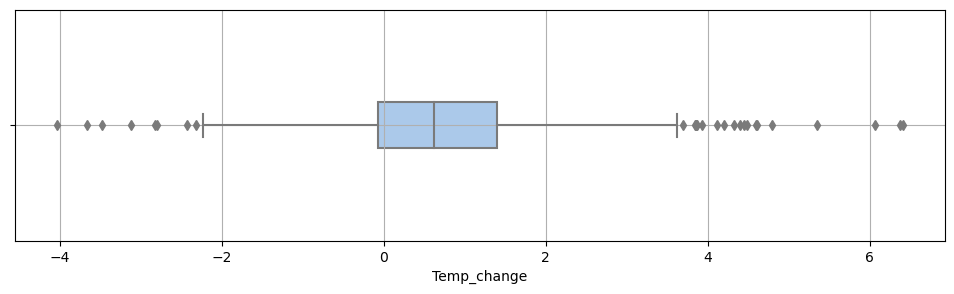

In [43]:
#rozkład danych dla miesięcy
fig = plt.subplots(figsize=(12,3))
sns.boxplot(x=e_months_p['Temp_change'], palette="pastel", width=0.2)
plt.grid(True)
plt.show()

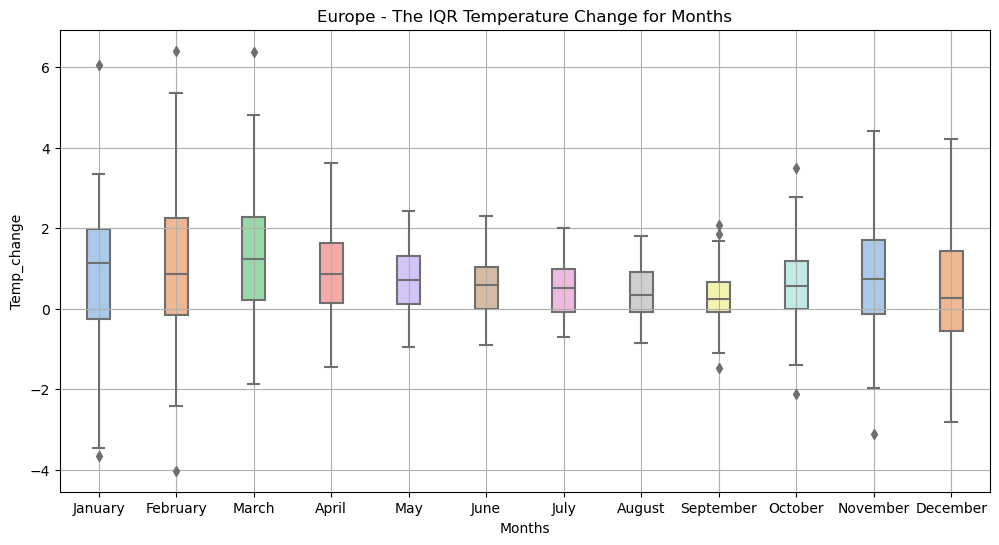

In [44]:
#boxploty dla zmiany temperatury dla poszczegolnych miesiącach dla Europy
fig = plt.subplots(figsize=(12,6))
sns.boxplot(x=e_months_p['Months'], y=e_months_p['Temp_change'], palette="pastel", width=0.3)
plt.grid(True)
plt.title('Europe - The IQR Temperature Change for Months')
plt.show()

Występowanie anomalii w zmianach temperatur w przypadku połowy miesięcy.

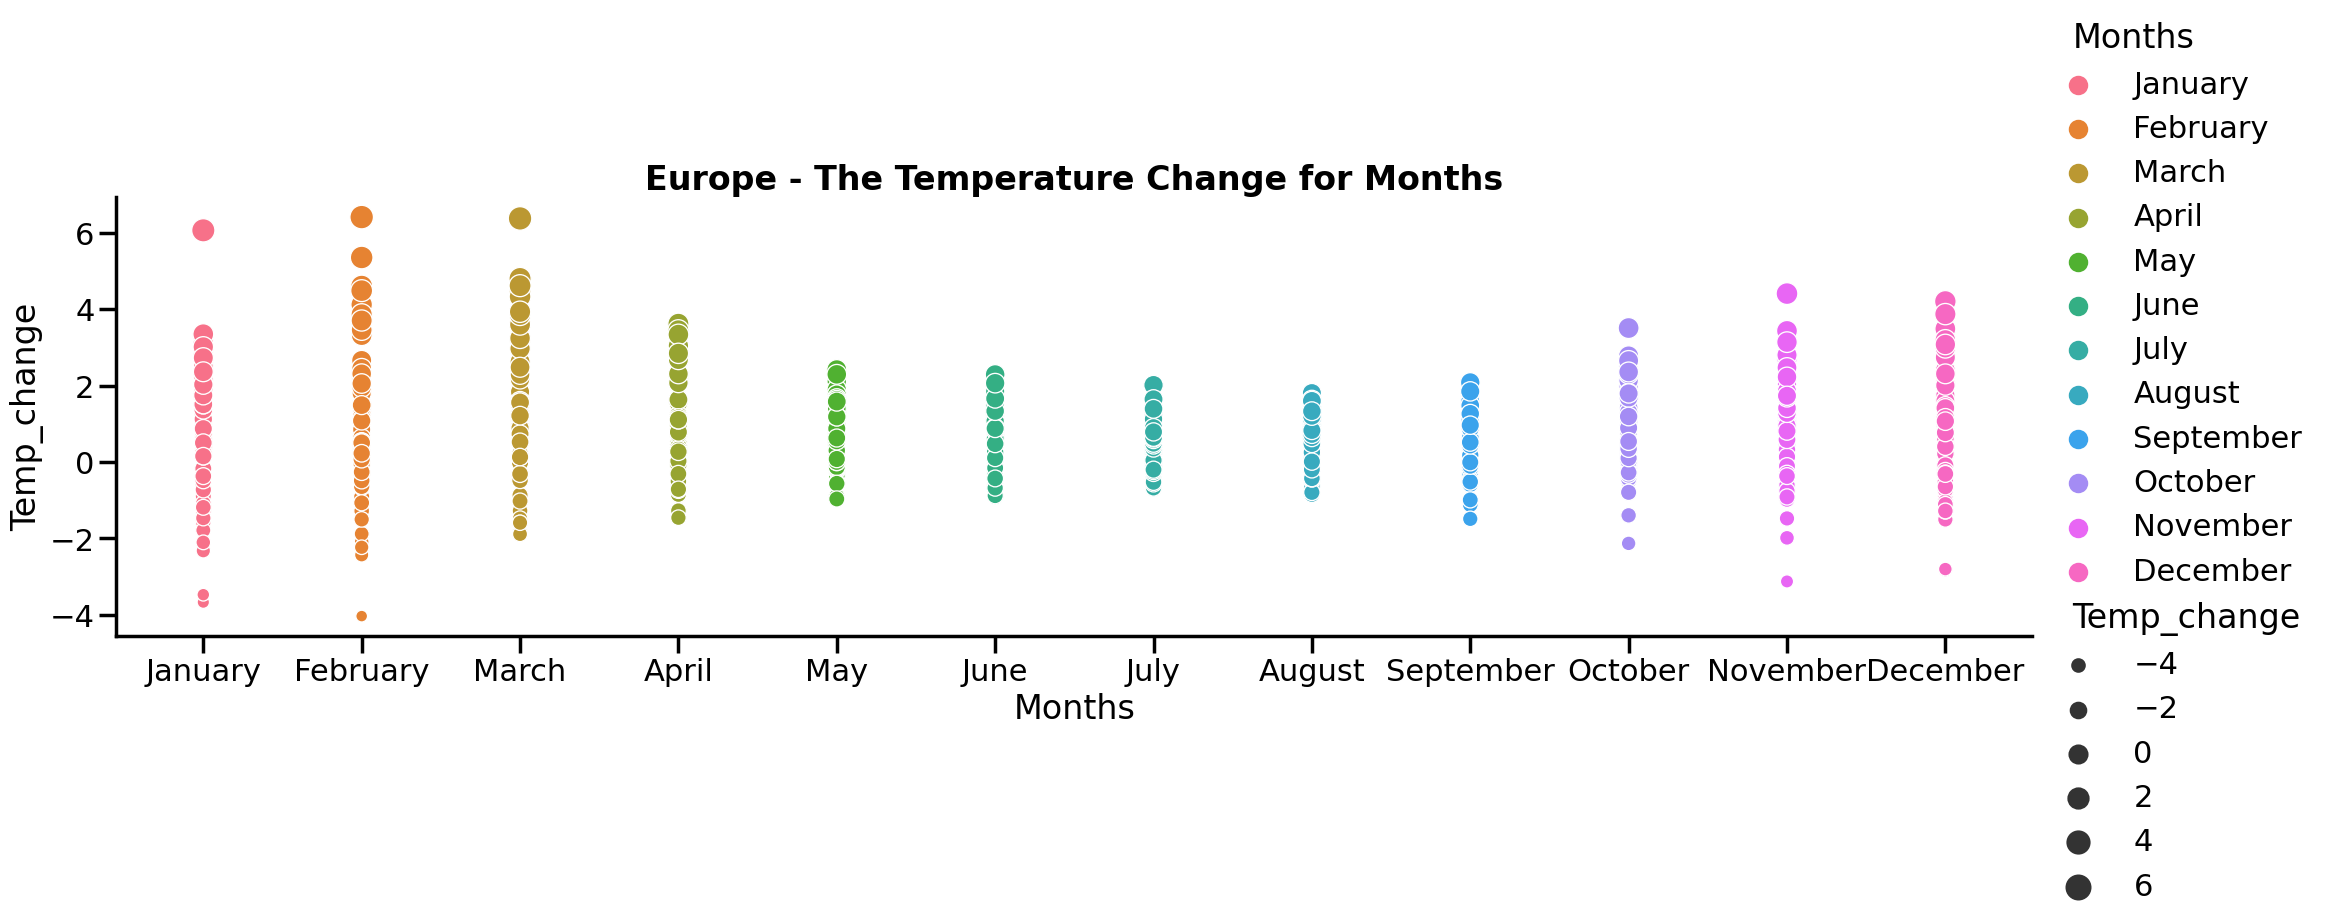

In [45]:
sns.set_context('poster')
sns.relplot(x="Months", 
            y='Temp_change',
            aspect=3.5, 
            height=6,
            data=e_months_p,
            size='Temp_change',
            hue="Months",
            legend="brief",
            kind="scatter");
plt.title('Europe - The Temperature Change for Months', weight='bold')
plt.show()


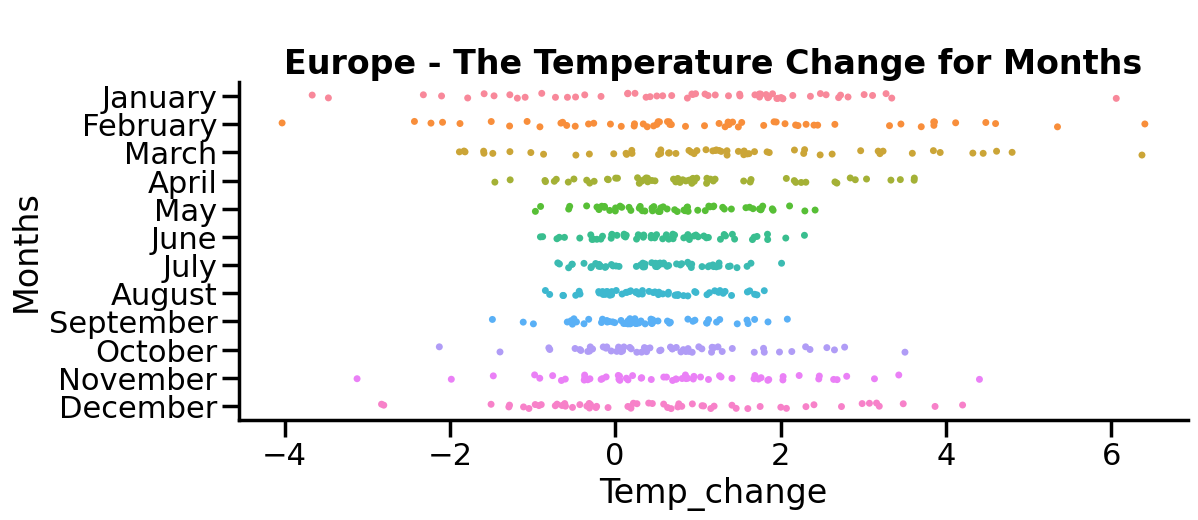

In [46]:
sns.catplot(x='Temp_change', 
            y="Months", 
            data=e_months_p, 
            aspect=2.5)
plt.title('\nEurope - The Temperature Change for Months', weight='bold')
plt.show()

## EUROPA - OBSZARY GEOGRAFICZNE

In [47]:
# zmiany temperatur dla roku meteo dla obszarów geograficznych Europy
enswe = ['Southern Europe', 'Northern Europe', 'Eastern Europe', 'Western Europe']
e_NSEW = df[(df['Area'].isin(enswe)) & (df['Months']=='Meteorological year')]
e_NSEW

,Area,Months,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
9076,Eastern Europe,Meteorological year,0.850,0.405,0.209,-0.638,-0.429,0.894,0.123,0.109,...,0.910,1.613,1.913,1.174,1.738,2.209,2.412,2.042,2.066,2.221
9110,Northern Europe,Meteorological year,1.271,-0.616,-0.438,0.329,-0.314,-1.285,0.599,-0.854,...,0.020,1.187,1.150,0.866,2.346,1.764,1.737,1.533,1.651,1.462
9144,Southern Europe,Meteorological year,0.768,0.262,-0.188,0.127,-0.332,0.468,0.149,0.090,...,0.986,1.266,1.314,1.077,1.582,1.567,1.704,1.645,1.600,1.627
9178,Western Europe,Meteorological year,0.908,-0.509,-0.991,-0.133,-0.720,0.427,0.645,0.046,...,0.328,1.358,1.300,0.675,2.250,1.649,1.867,1.721,2.202,2.137


In [48]:
#sprawdzenie braków
e_NSEW.isnull().sum().sum()

0

In [51]:
# zmiana architektury tabelki
e_NSEW_p = e_NSEW.melt(id_vars=['Area', 'Months'], var_name='Year', value_name='Temp_change')
e_NSEW_p.head()

,Area,Months,Year,Temp_change
0,Eastern Europe,Meteorological year,1961,0.850
1,Northern Europe,Meteorological year,1961,1.271
2,Southern Europe,Meteorological year,1961,0.768
3,Western Europe,Meteorological year,1961,0.908
4,Eastern Europe,Meteorological year,1962,0.405


In [52]:
e_NSEW_p.groupby(['Year', 'Area']).mean()

Temp_change
Year Area                        
1961 Eastern Europe         0.850
     Northern Europe        1.271
     Southern Europe        0.768
     Western Europe         0.908
1962 Eastern Europe         0.405
...                           ...
2018 Western Europe         2.202
2019 Eastern Europe         2.221
     Northern Europe        1.462
     Southern Europe        1.627
     Western Europe         2.137

[236 rows x 1 columns]

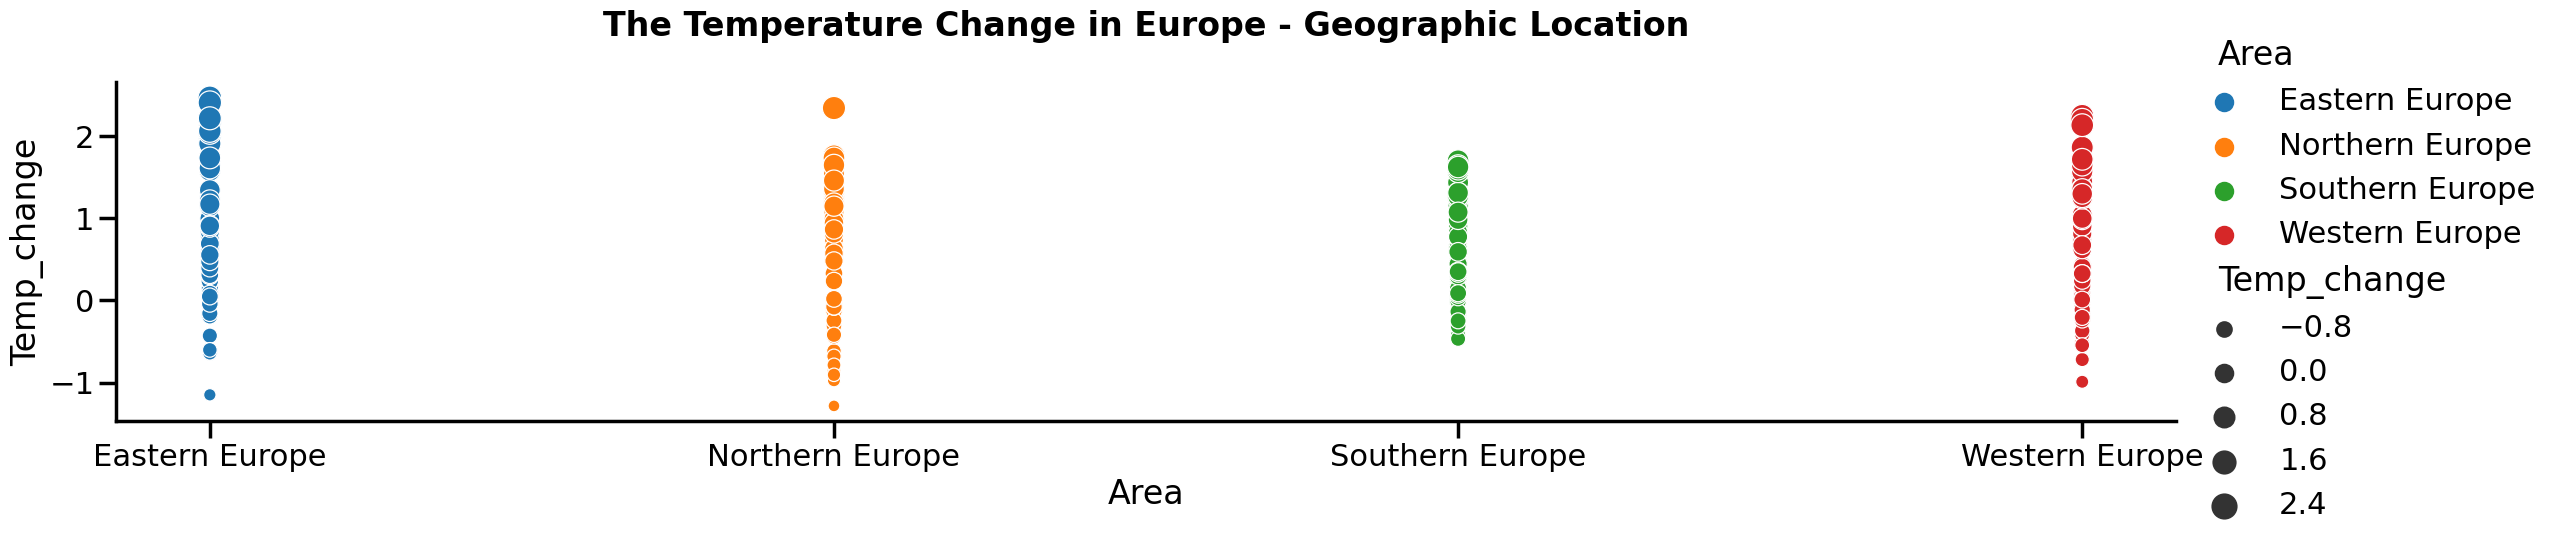

In [53]:
sns.relplot(x="Area", 
            y='Temp_change',
            aspect=4.5, 
            data=e_NSEW_p,
            size='Temp_change',
            hue='Area',
           
            kind="scatter");
plt.title('The Temperature Change in Europe - Geographic Location\n',weight='bold')
plt.show()

Wykres przedstawia średnie wartości zmian temperatury na obszarze Europy z podziałem geograficznym. Obszar, na ktorym odnotowano najmniejsze zmiany temperatury w badanym okresie to Europa Południowa. 

In [54]:
W = e_NSEW_p[e_NSEW_p['Area']=='Western Europe']
E = e_NSEW_p[e_NSEW_p['Area']=='Eastern Europe']
N = e_NSEW_p[e_NSEW_p['Area']=='Northern Europe']
S = e_NSEW_p[e_NSEW_p['Area']=='Southern Europe']

europa_trend = e_NSEW_p #srednie zmiany temperatury 

In [55]:
# statystyka dla Europy kierunki gograficzne
e_NSEW_describe = pd.concat([W.describe(),E.describe(),N.describe(),S.describe()], axis=1)
e_NSEW_describe.columns=['Western Europe', 'Eastern Europe', 'Northern Europe','Southern Europe']
e_NSEW_describe

,Western Europe,Eastern Europe,Northern Europe,Southern Europe
count,59.000000,59.000000,59.00000,59.000000
mean,0.679322,0.757441,0.59739,0.568305
std,0.805617,0.860933,0.87075,0.638464
min,-0.991000,-1.150000,-1.28500,-0.467000
25%,-0.014500,0.179500,-0.10550,0.079500
50%,0.744000,0.693000,0.74500,0.468000
75%,1.287500,1.295000,1.29700,1.058500
max,2.250000,2.471000,2.34600,1.704000


In [56]:
# porównanie średnich zmian temperatur w Europie z podziałem na obszary geograficzne
meanNWSE = e_NSEW_describe.loc['mean'].sort_values(ascending=False)
meanNWSE

Eastern Europe     0.757441
Western Europe     0.679322
Northern Europe    0.597390
Southern Europe    0.568305
Name: mean, dtype: float64

In [57]:
meanNWSE = pd.DataFrame(meanNWSE)
meanNWSE

,mean
Eastern Europe,0.757441
Western Europe,0.679322
Northern Europe,0.597390
Southern Europe,0.568305


In [58]:
meanNWSE.reset_index(inplace=True)

In [59]:
meanNWSE = meanNWSE.rename(columns={'index':'Area'})

In [60]:
#dane dotyczace średniej zmiany temperatury w Europie z podziałem na obszary geograficzne do wizualizacji
meanNWSE

,Area,mean
0,Eastern Europe,0.757441
1,Western Europe,0.679322
2,Northern Europe,0.597390
3,Southern Europe,0.568305


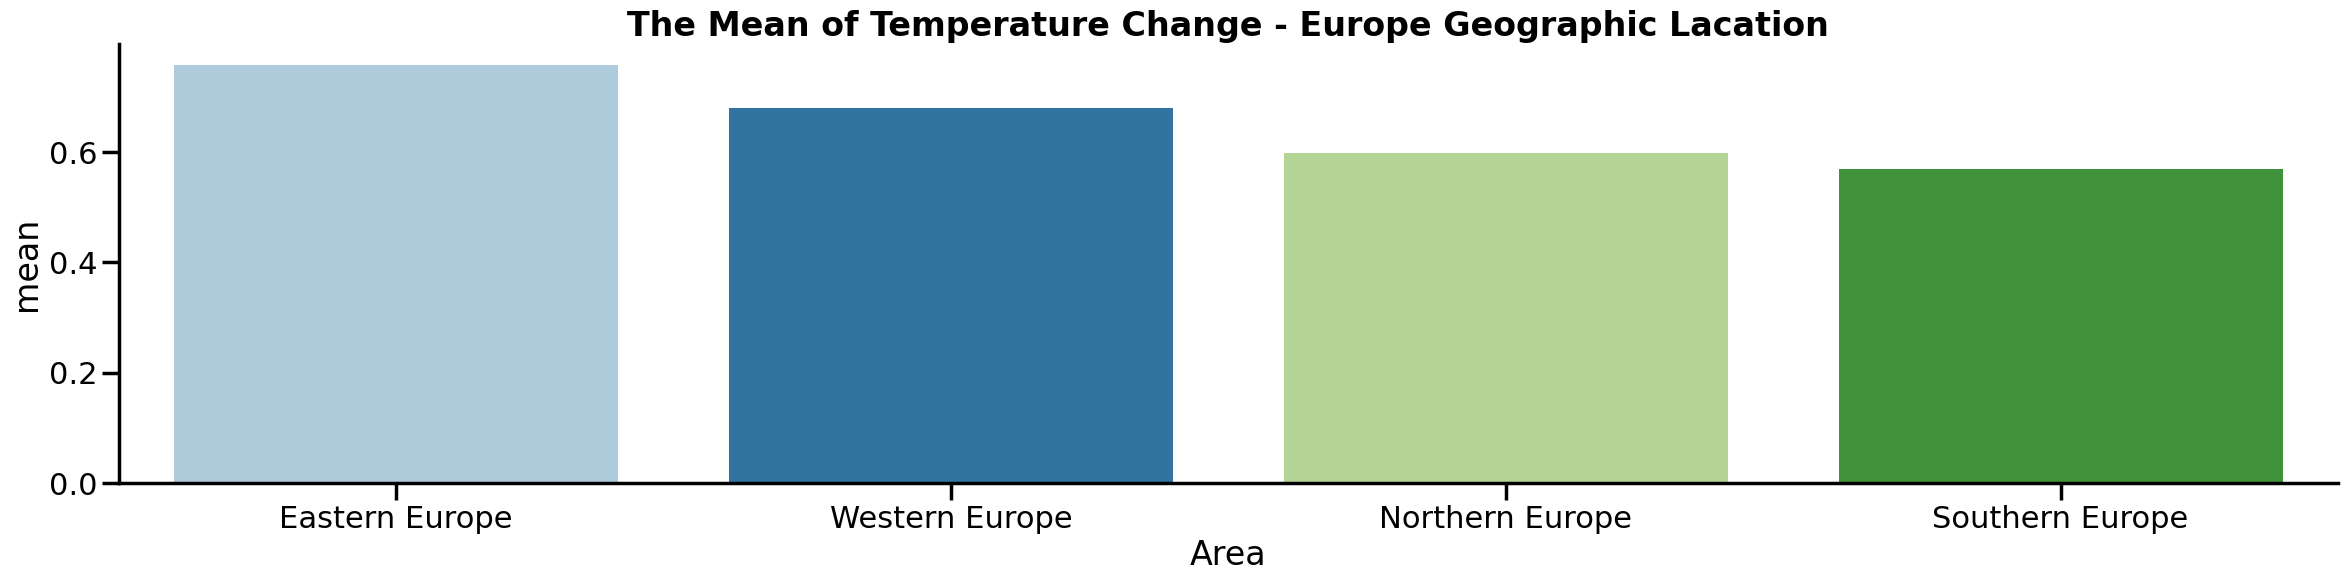

In [61]:
# wizualizacja średniej zmiany temperatury w Europie z podziałem na obszary geograficzne
pal = sns.color_palette("Paired", len(meanNWSE['Area'])) 
sns.catplot(x='Area', 
            y='mean', 
            height=6, aspect=4, 
            data=meanNWSE,
            kind='bar',
            palette=pal)
plt.title('The Mean of Temperature Change - Europe Geographic Lacation', weight='bold')
plt.show()

Najszybciej ociepla się wschodnia część Europy.

# KRAJE EUROPY

In [62]:
#lista krajów Europy
countries_e = ['Albania', 'Andorra', 'Austria', 'Belgium','Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Cyprus', 'Croatia', 'Montenegro', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Greece', 'Spain',  'Netherlands', 'Ireland', 'Iceland', 'Kazakhstan', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta', 'Monaco', 'Germany', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino','Slovakia', 'Slovenia', 'Switzerland', 'Sweden', 'Turkey', 'Ukraine', 'Hungary', 'United Kingdom', 'Italy']
# rok meteorologiczny dla krajów Europy
countries = df[(df['Area'].isin(countries_e)) & (df['Months']=='Meteorological year')]
countries

,Area,Months,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
66,Albania,Meteorological year,0.631,0.339,0.084,-0.171,-0.392,0.551,-0.084,0.071,...,1.294,1.123,1.603,1.495,1.399,1.725,1.697,1.337,2.232,1.911
168,Andorra,Meteorological year,0.749,0.110,-0.755,0.305,-0.500,0.403,0.616,0.001,...,0.441,1.643,1.233,0.794,1.899,1.619,1.917,1.853,1.826,1.871
474,Austria,Meteorological year,1.035,-0.619,-0.721,-0.367,-0.882,0.605,0.677,0.211,...,0.664,1.376,1.788,1.098,2.404,2.153,2.083,1.730,2.511,2.365
678,Belarus,Meteorological year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.436,0.994,1.534,1.184,2.150,2.230,2.187,1.577,2.320,2.657
712,Belgium,Meteorological year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.229,1.286,1.132,0.467,2.428,1.370,1.866,1.719,2.201,2.075
916,Bosnia and Herzegovina,Meteorological year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.010,1.163,1.804,1.368,1.873,1.845,1.708,1.449,2.308,2.060
1086,Bulgaria,Meteorological year,0.888,0.474,-0.257,-0.539,-0.461,1.143,0.020,0.415,...,1.304,0.368,1.634,1.438,1.189,1.438,1.875,0.910,2.183,2.122
1936,Croatia,Meteorological year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.874,1.268,1.857,1.278,2.039,1.922,1.832,1.547,2.301,2.143
2004,Cyprus,Meteorological year,0.040,0.799,0.704,-0.577,-0.176,0.673,-0.750,-0.020,...,1.991,0.710,0.940,1.211,1.074,1.200,1.581,0.859,2.185,1.566
2038,Czechia,Meteorological year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.417,1.047,1.586,0.783,2.510,2.122,2.079,1.597,2.659,2.552


In [63]:
#braki w danych dla krajów Europy
countries.isnull().sum().sum()

466

In [64]:
#sprawdzenie braków w kolumnach
countries.isnull().sum().sort_values(ascending=False)

1989      14
1975      14
1991      14
1990      14
1988      14
          ..
2008       0
2007       0
2006       0
Months     0
2019       0
Length: 61, dtype: int64

In [65]:
#wiersze z jakimkolwiek brakiem
countries[countries.isnull().any(axis=1)]

,Area,Months,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
678,Belarus,Meteorological year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.436,0.994,1.534,1.184,2.150,2.230,2.187,1.577,2.320,2.657
712,Belgium,Meteorological year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.229,1.286,1.132,0.467,2.428,1.370,1.866,1.719,2.201,2.075
916,Bosnia and Herzegovina,Meteorological year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.010,1.163,1.804,1.368,1.873,1.845,1.708,1.449,2.308,2.060
1936,Croatia,Meteorological year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.874,1.268,1.857,1.278,2.039,1.922,1.832,1.547,2.301,2.143
2038,Czechia,Meteorological year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.417,1.047,1.586,0.783,2.510,2.122,2.079,1.597,2.659,2.552
2480,Estonia,Meteorological year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.550,1.301,1.477,1.188,2.441,2.393,1.932,1.524,2.442,2.213
3908,Kazakhstan,Meteorological year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.330,0.754,1.163,1.636,0.682,1.612,2.256,1.779,0.653,1.469
4112,Latvia,Meteorological year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.691,1.138,1.396,1.074,2.313,2.165,1.939,1.510,2.359,2.448
4316,Lithuania,Meteorological year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.748,0.940,1.349,0.953,2.217,2.092,1.951,1.557,2.436,2.627
4350,Luxembourg,Meteorological year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.316,1.337,1.255,0.565,2.482,1.540,1.889,1.668,2.494,2.177


In [66]:
#obliczenie ilośći braków w każdym wierszu
countries.set_index('Area', inplace=True)
countries.isnull().sum(axis=1).sort_values(ascending=False)

Area
Montenegro                45
Luxembourg                39
Belgium                   39
Czechia                   32
Slovakia                  32
Lithuania                 31
Kazakhstan                31
Slovenia                  31
Estonia                   31
Latvia                    31
Croatia                   31
Bosnia and Herzegovina    31
Belarus                   31
Ukraine                   31
Sweden                     0
Switzerland                0
Monaco                     0
Turkey                     0
San Marino                 0
Romania                    0
Portugal                   0
Poland                     0
Norway                     0
Netherlands                0
Spain                      0
Albania                    0
Malta                      0
Liechtenstein              0
Andorra                    0
Italy                      0
Ireland                    0
Iceland                    0
Hungary                    0
Greece                     0
Germany  

In [67]:
#usunięcie kolumn z jakimkolwiek brakiem w danych 
countries1 = countries.dropna(axis=1, how='any') 

In [68]:
countries1.isnull().sum().sum()

0

In [69]:
countries1.reset_index(inplace=True)

In [70]:
countries1

,Area,Months,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Albania,Meteorological year,0.492,1.475,1.129,1.002,1.294,1.123,1.603,1.495,1.399,1.725,1.697,1.337,2.232,1.911
1,Andorra,Meteorological year,1.494,1.005,0.912,1.381,0.441,1.643,1.233,0.794,1.899,1.619,1.917,1.853,1.826,1.871
2,Austria,Meteorological year,0.923,2.150,1.592,1.550,0.664,1.376,1.788,1.098,2.404,2.153,2.083,1.730,2.511,2.365
3,Belarus,Meteorological year,0.633,2.347,2.239,1.583,1.436,0.994,1.534,1.184,2.150,2.230,2.187,1.577,2.320,2.657
4,Belgium,Meteorological year,1.393,1.875,1.247,1.156,0.229,1.286,1.132,0.467,2.428,1.370,1.866,1.719,2.201,2.075
5,Bosnia and Herzegovina,Meteorological year,0.627,1.909,1.420,1.427,1.010,1.163,1.804,1.368,1.873,1.845,1.708,1.449,2.308,2.060
6,Bulgaria,Meteorological year,0.520,1.834,1.141,1.247,1.304,0.368,1.634,1.438,1.189,1.438,1.875,0.910,2.183,2.122
7,Croatia,Meteorological year,0.724,1.990,1.464,1.504,0.874,1.268,1.857,1.278,2.039,1.922,1.832,1.547,2.301,2.143
8,Cyprus,Meteorological year,0.638,0.835,1.050,1.015,1.991,0.710,0.940,1.211,1.074,1.200,1.581,0.859,2.185,1.566
9,Czechia,Meteorological year,0.958,2.174,1.650,1.429,0.417,1.047,1.586,0.783,2.510,2.122,2.079,1.597,2.659,2.552


In [71]:
#zmiana architektury tabelki z panstawmi bez braków
countries_p = countries1.melt(id_vars=['Area', 'Months'], var_name='Year', value_name='Temp_change')

In [72]:
#wybór ostatnich 10 lat
countries_p = countries_p[countries_p['Year'].isin(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017','2018', '2019'])]
countries_p

,Area,Months,Year,Temp_change
126,Albania,Meteorological year,2009,1.002
127,Andorra,Meteorological year,2009,1.381
128,Austria,Meteorological year,2009,1.550
129,Belarus,Meteorological year,2009,1.583
130,Belgium,Meteorological year,2009,1.156
...,...,...,...,...
583,Sweden,Meteorological year,2019,1.567
584,Switzerland,Meteorological year,2019,2.075
585,Turkey,Meteorological year,2019,1.701
586,Ukraine,Meteorological year,2019,2.368


In [73]:
# top 10 panstw europejskich z najwiekszą średnia zmiana temperatury dla ostatnich 10 lat
d = countries_p.groupby(['Area',]).agg({'Temp_change':'mean'})
d = d.sort_values(by=['Temp_change'], ascending=False).head(10)

In [74]:
d.reset_index(inplace=True)

In [75]:
d

,Area,Temp_change
0,Slovenia,1.835455
1,Belarus,1.804727
2,Austria,1.792909
3,Estonia,1.734182
4,Ukraine,1.728000
5,Hungary,1.716182
6,Finland,1.708455
7,Czechia,1.707364
8,Croatia,1.687727
9,Latvia,1.685364


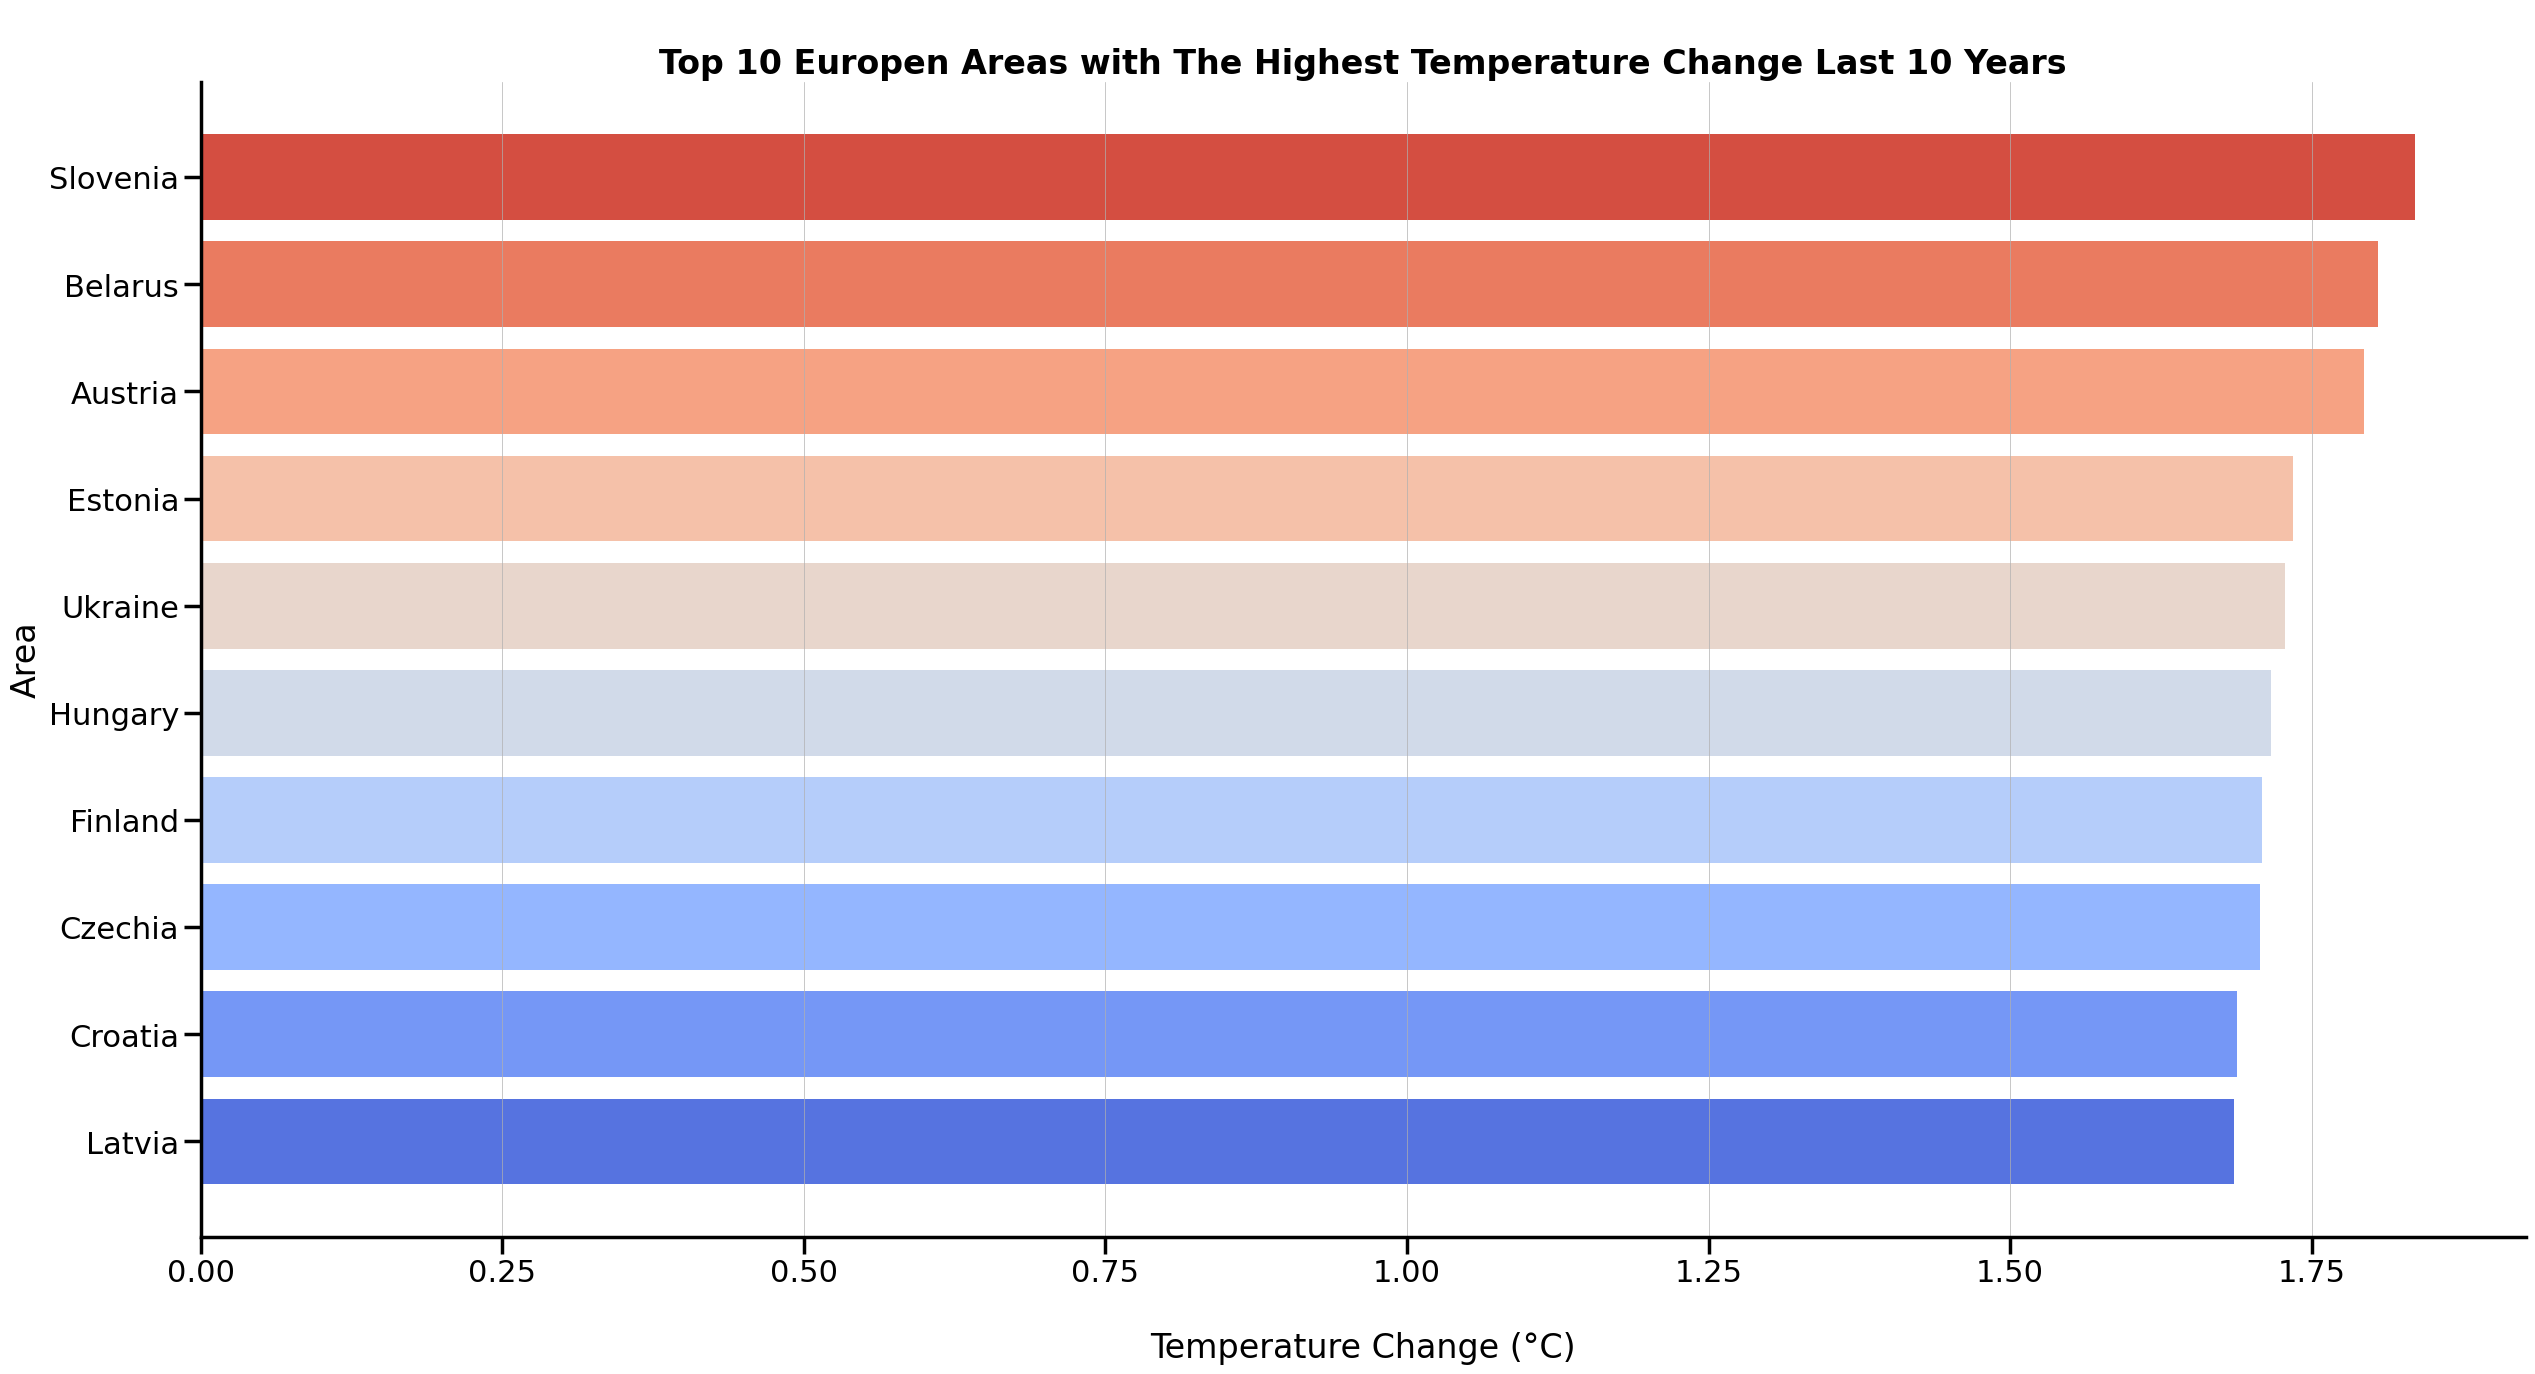

In [76]:
fig, ax = plt.subplots(figsize=(30, 15))

pal = sns.color_palette("coolwarm", len(d['Area']))
data = d.groupby("Temp_change").size() 
rank = data.argsort().argsort()

colo=np.array(pal[::-1])

bar1 = plt.barh(d['Area'], d['Temp_change'], color=colo)
ax.invert_yaxis()

# Add x, y gridlines
plt.grid(axis='x', linewidth = 0.5)

ax.spines['right'].set_visible(False) #usuiecie prawej osi ramki
ax.spines['top'].set_visible(False) #usuniecie gorenj osi ramki

plt.title("\nTop 10 Europen Areas with The Highest Temperature Change Last 10 Years", weight='bold')
plt.xlabel("\nTemperature Change (°C)")
plt.ylabel("Area")
plt.show()

#https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot

In [77]:
# top 10 panst europejskich z najmniejszą zmiana temperaatury dla ostatnich 10 lat
d = countries_p.groupby(['Area',]).agg({'Temp_change':'mean'})
e = d.sort_values(by=['Temp_change'], ascending=True).head(10)

In [78]:
e.reset_index(inplace=True)

In [79]:
e

,Area,Temp_change
0,Ireland,0.783273
1,United Kingdom,0.896909
2,Iceland,1.049636
3,Greece,1.231364
4,Cyprus,1.302909
5,Turkey,1.319091
6,Norway,1.321545
7,Kazakhstan,1.322000
8,Spain,1.331545
9,Portugal,1.363091


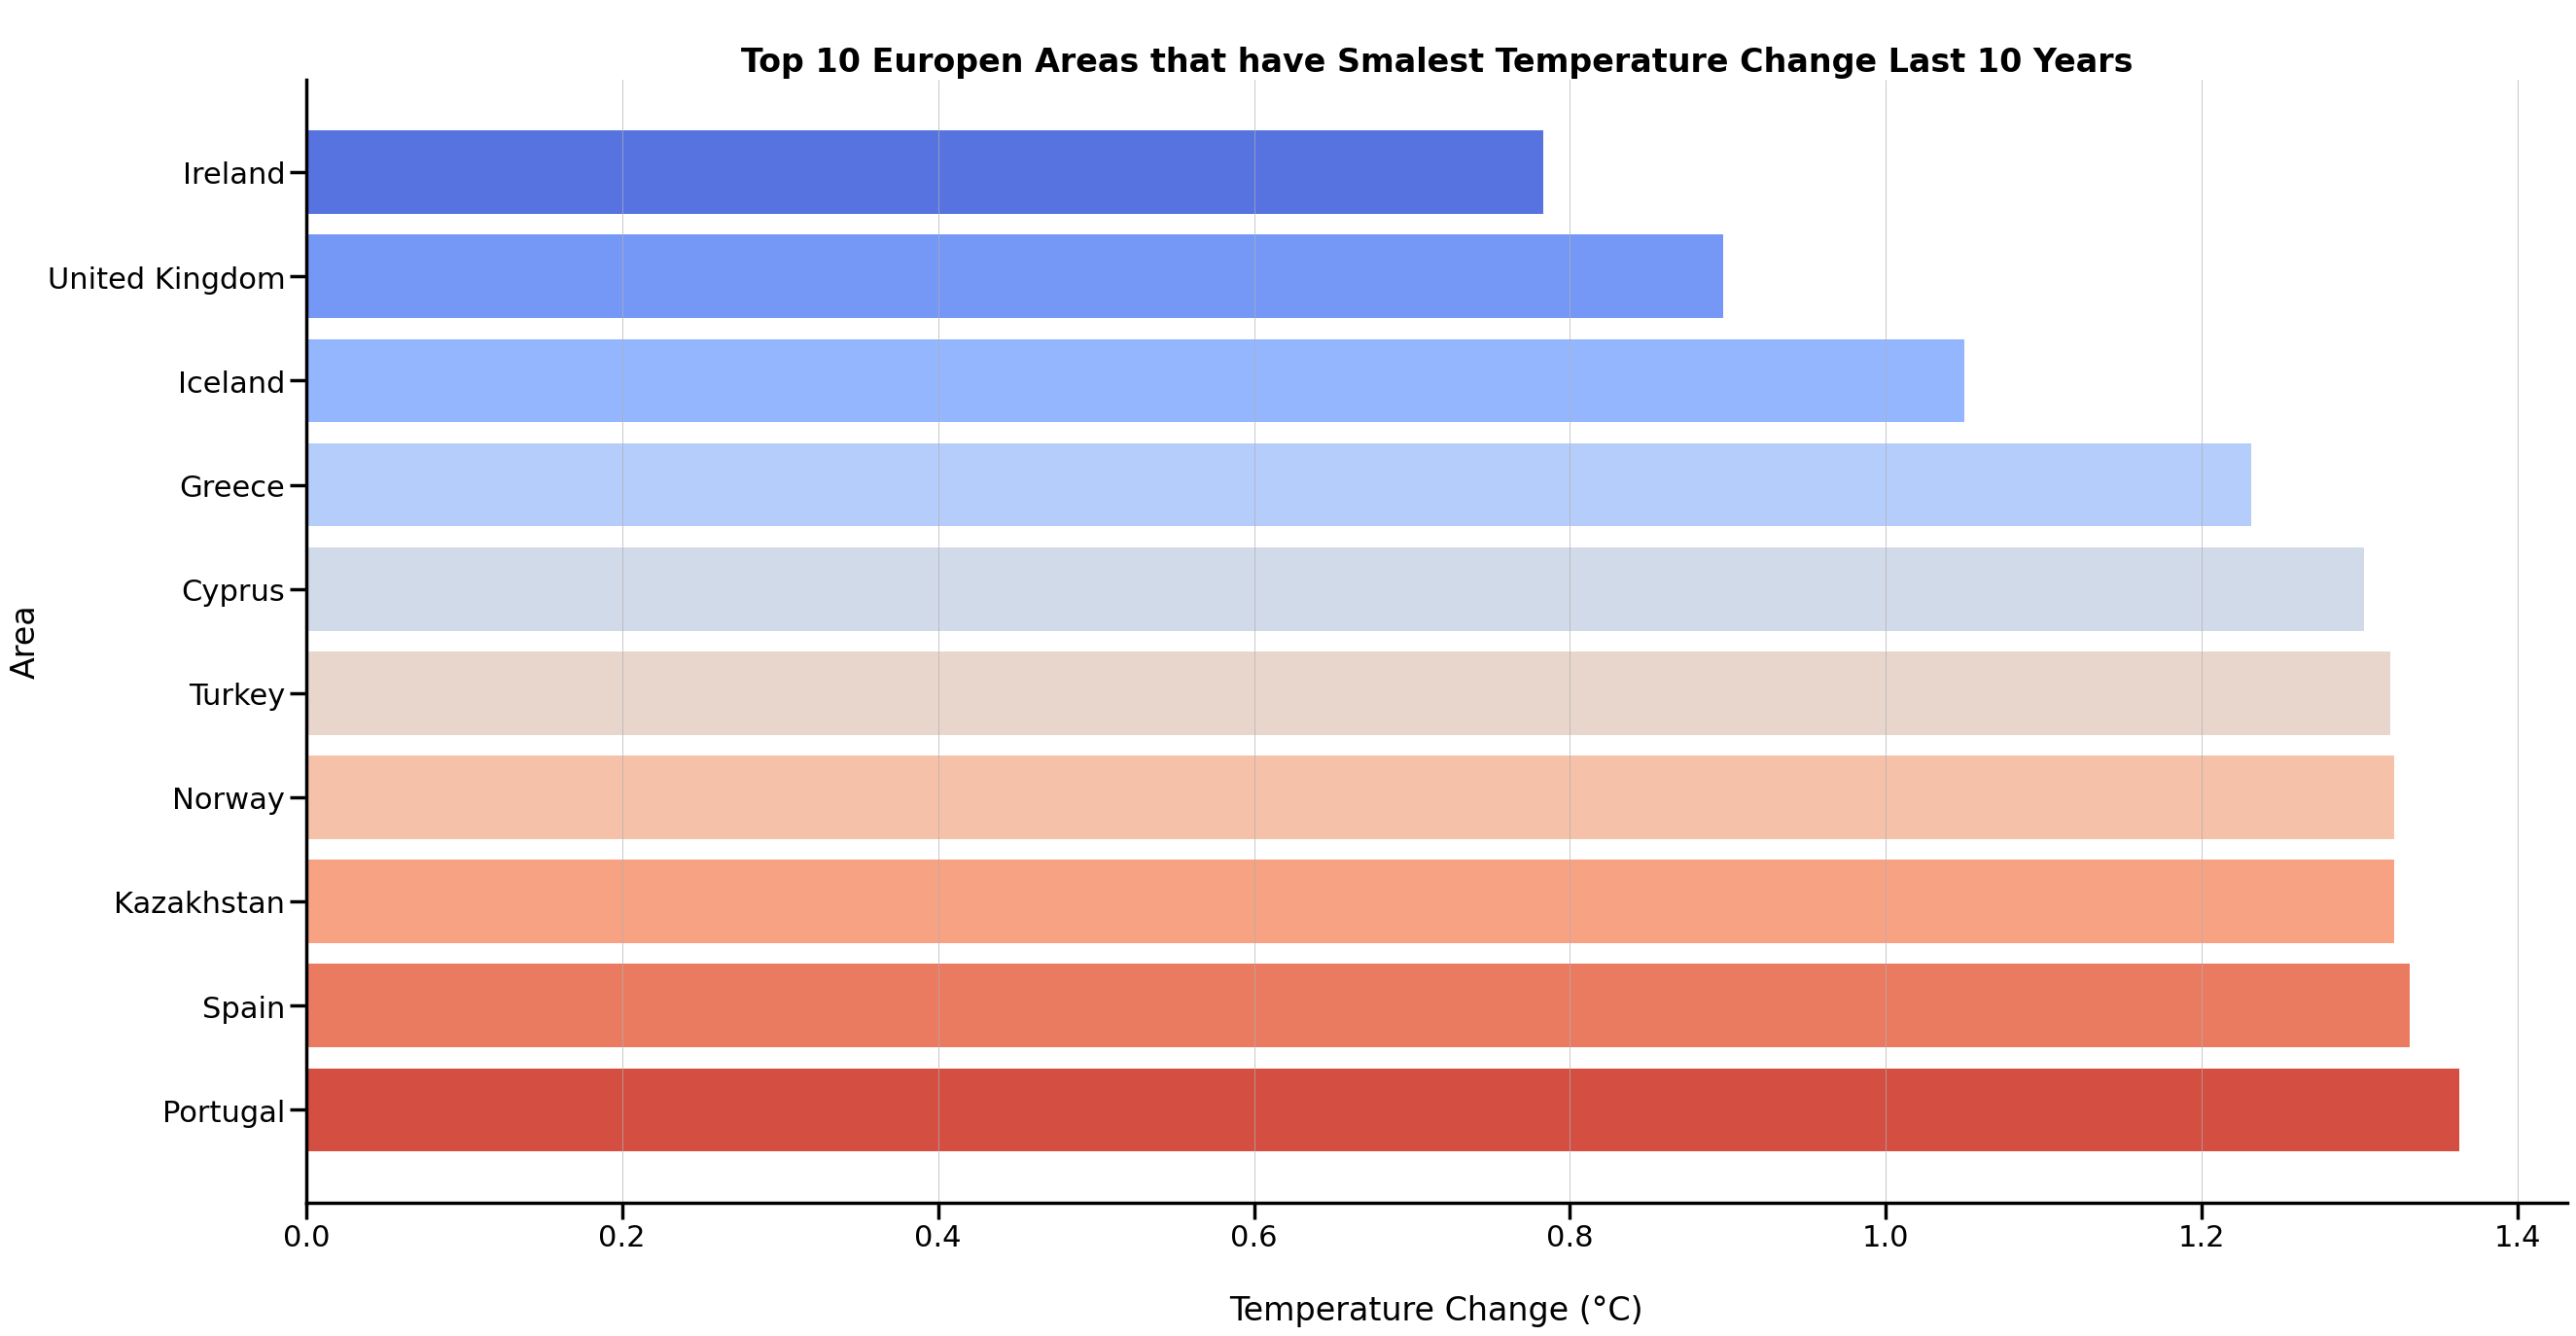

In [80]:
fig, ax = plt.subplots(figsize=(30, 15))

pal = sns.color_palette("coolwarm", len(e['Area']))
data = d.groupby("Temp_change").size() 
rank = data.argsort().argsort()

colo=np.array(pal)

bar1 = plt.barh(e['Area'], e['Temp_change'], color=colo)
ax.invert_yaxis()

# Add x, y gridlines
plt.grid(axis='x', linewidth = 0.5)
ax.spines['right'].set_visible(False) #usuiecie prawej osi ramki
ax.spines['top'].set_visible(False) #usuniecie gorenj osi ramki

plt.title("\nTop 10 Europen Areas that have Smalest Temperature Change Last 10 Years", weight='bold')
plt.xlabel("\nTemperature Change (°C)")
plt.ylabel("Area")
plt.show()

In [81]:
# panstwa europejskie - zmiana temperatury dla ostatnich 10 lat
d_all = countries_p.groupby(['Area',]).agg({'Temp_change':'mean'})
d_all = d_all.sort_values(by=['Temp_change'], ascending=False)

In [82]:
d_all.reset_index(inplace=True)

In [83]:
d_all

,Area,Temp_change
0,Slovenia,1.835455
1,Belarus,1.804727
2,Austria,1.792909
3,Estonia,1.734182
4,Ukraine,1.728000
5,Hungary,1.716182
6,Finland,1.708455
7,Czechia,1.707364
8,Croatia,1.687727
9,Latvia,1.685364


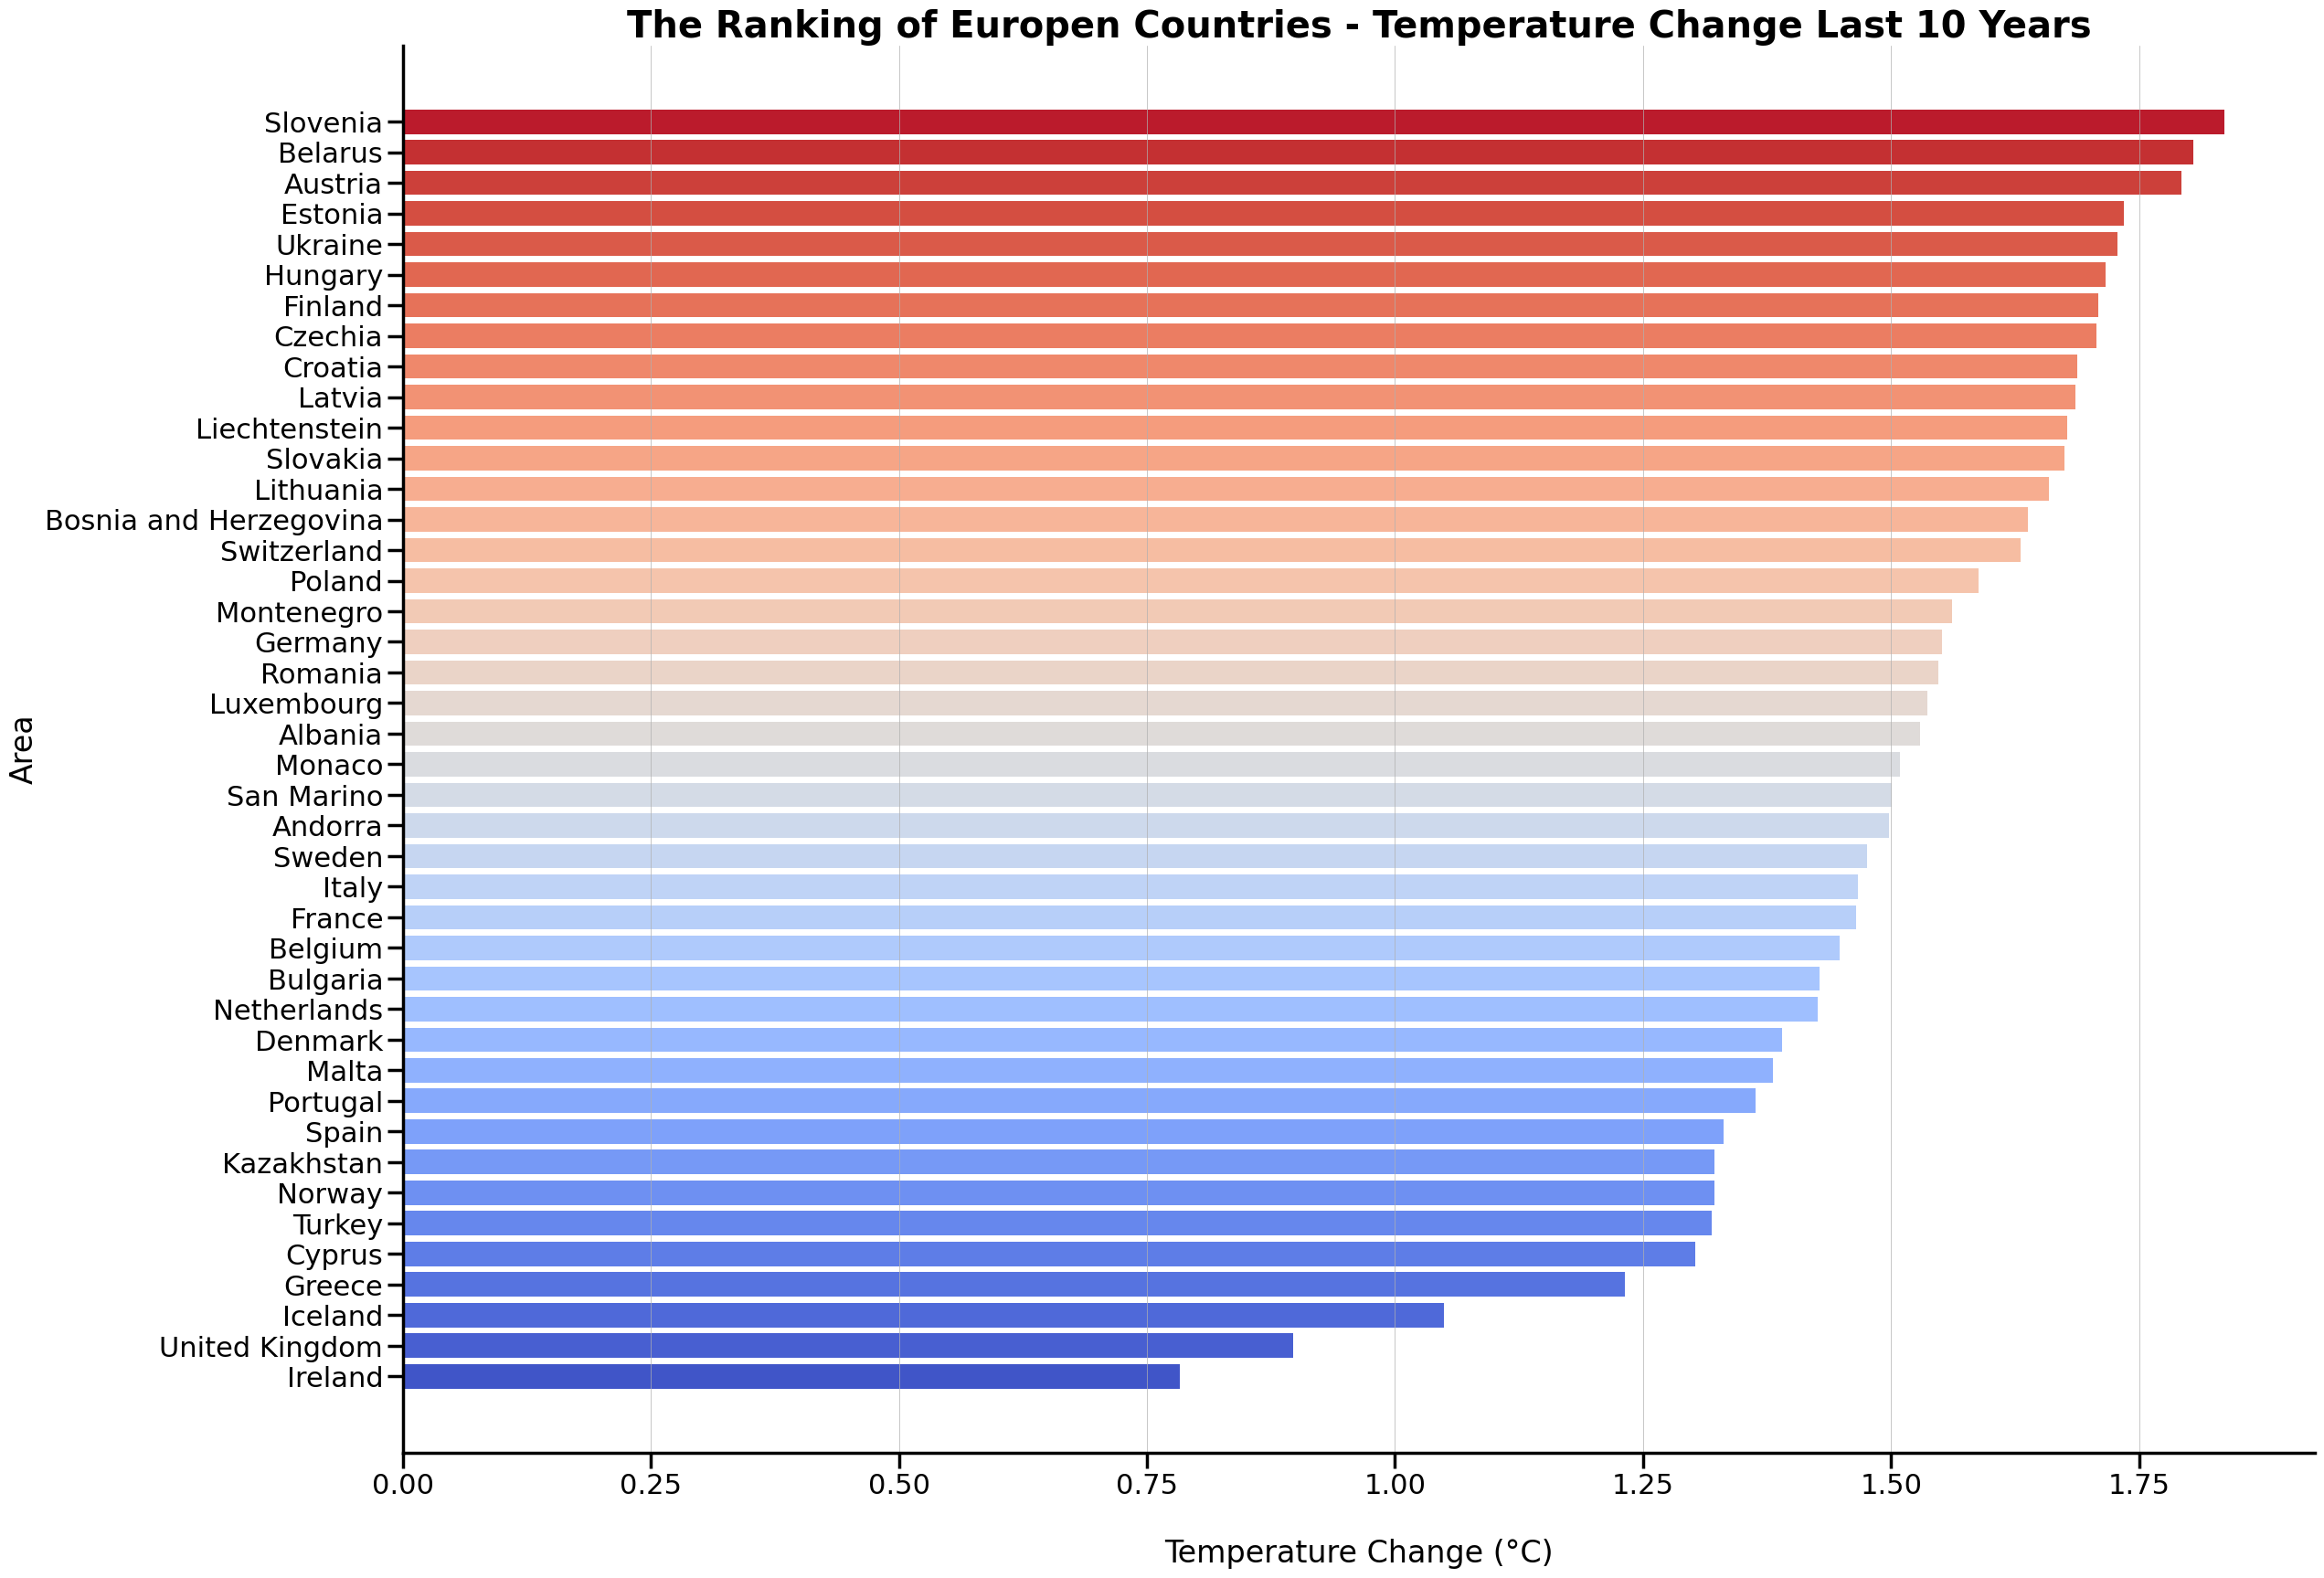

In [84]:
fig, ax = plt.subplots(figsize=(27, 20))

pal = sns.color_palette("coolwarm", len(d_all['Area']))
data = d_all.groupby("Temp_change").size() 
rank = data.argsort().argsort()

colo=np.array(pal[::-1])

bar1 = plt.barh(d_all['Area'], d_all['Temp_change'], color=colo)
ax.invert_yaxis()

# Add x, y gridlines
plt.grid(axis='x', linewidth = 0.5)

ax.spines['right'].set_visible(False) #usuiecie prawej osi ramki
ax.spines['top'].set_visible(False) #usuniecie gorenj osi ramki

plt.title("The Ranking of Europen Countries - Temperature Change Last 10 Years", weight='bold', fontsize='large')
plt.xlabel("\nTemperature Change (°C)")
plt.ylabel("Area")
plt.show()

# Mapa

https://coderzcolumn.com/tutorials/data-science/plotting-static-maps-with-geopandas-working-with-geospatial-data?fbclid=IwAR0FBDsi3TUtWyqW1fjmYM8MbOJEGG7BoDTNzXOlL2l35JcrOYn3WpoKmQg

In [85]:
!pip install geopandas
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [86]:
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
print("Geometry Column Name : ", world.geometry.name)
print("Dataset Size : ", world.shape)

Geometry Column Name :  geometry
Dataset Size :  (177, 6)


In [87]:
E = world[world['continent']=='Europe']

In [88]:
#bez Rosji!!!!!!
E = E.iloc[1:,:]

In [89]:
E.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
21,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
43,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
110,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
111,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."
112,44385155.0,Europe,Ukraine,UKR,153781,"POLYGON ((32.15944 52.06125, 32.41206 52.28869..."


In [90]:
#lista krajów europejskich bez braków w danych
print(list(countries1['Area']))

['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom']


In [91]:
kreaje__bez_brakow = list(countries1['Area'])

In [92]:
E = E[E['name'].isin(kreaje__bez_brakow)]

In [93]:
E.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
21,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
43,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
110,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
111,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."
112,44385155.0,Europe,Ukraine,UKR,153781,"POLYGON ((32.15944 52.06125, 32.41206 52.28869..."


In [94]:
# złączenie georamki Europy z ramką "d_all"
europe_tem_change_final = E.merge(d_all, how="left", left_on=['name'], right_on=['Area'])

print("Type of DataFrame : ", type(europe_tem_change_final)) #sprawdzamy, czy na wyjsciu mamay obietk geodata?

europe_tem_change_final.head()

Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'>


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Area,Temp_change
0,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",Norway,1.321545
1,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",France,1.465091
2,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",Sweden,1.476091
3,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((28.17671 56.16913, 29.22951 55.91834...",Belarus,1.804727
4,44385155.0,Europe,Ukraine,UKR,153781,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...",Ukraine,1.728000


In [95]:
#ranking państw europejskich z największą zmiana temperatury
europe_tem_change_final = europe_tem_change_final.sort_values('Temp_change', ascending=False)

In [96]:
europe_tem_change_final.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Area,Temp_change
28,2087946.0,Europe,Slovenia,SVN,54174,"POLYGON ((13.80648 46.50931, 14.63247 46.43182...",Slovenia,1.835455
3,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((28.17671 56.16913, 29.22951 55.91834...",Belarus,1.804727
6,8877067.0,Europe,Austria,AUT,445075,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",Austria,1.792909
11,1326590.0,Europe,Estonia,EST,31471,"POLYGON ((27.98113 59.47537, 27.98112 59.47537...",Estonia,1.734182
4,44385155.0,Europe,Ukraine,UKR,153781,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...",Ukraine,1.728000


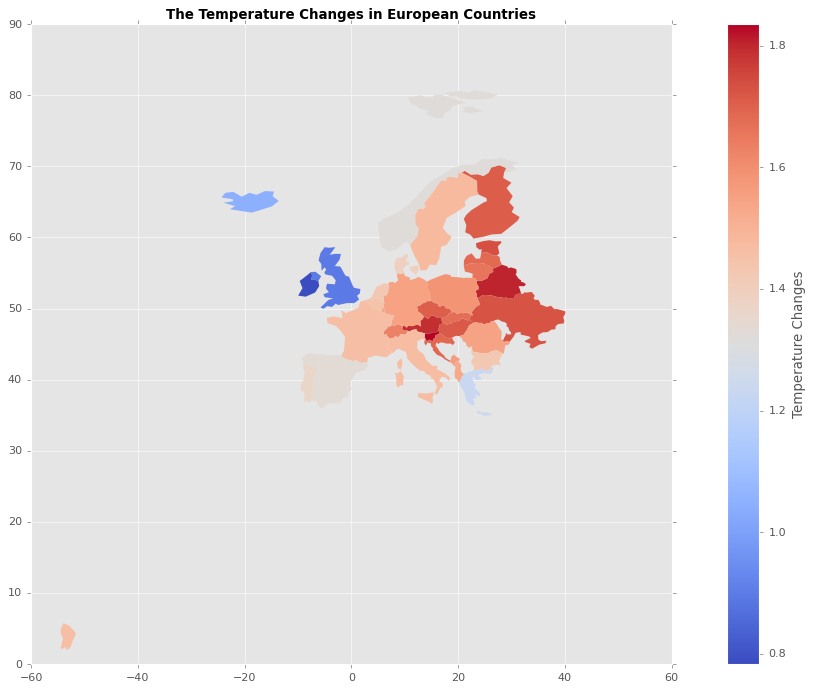

In [97]:
with plt.style.context(("classic","ggplot")):
    europe_tem_change_final.plot('Temp_change', 
                             figsize=(18,10), 
                             legend=True,
                             legend_kwds={"label":"Temperature Changes"},
                             cmap='coolwarm')
                             
    xlim = (-40,50)
    ylim = (30,90)
    plt.title("The Temperature Changes in European Countries",weight='bold', fontsize='large')

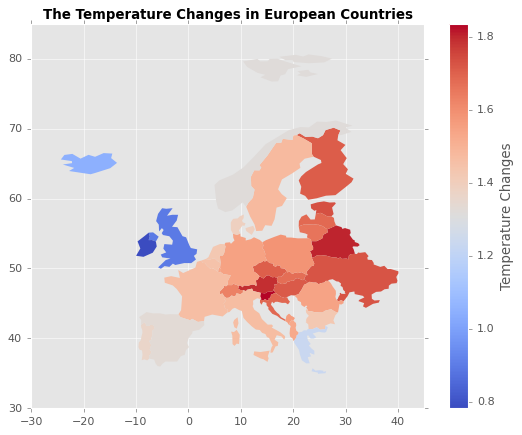

In [98]:
#ustawienie granic widoku osi
with plt.style.context(("classic","ggplot")):
    fig, ax = plt.subplots(1,1)
    
    europe_tem_change_final.plot(column='Temp_change', 
                                   ax=ax,
                             figsize=(18,10), 
                             legend=True,
                             legend_kwds={"label":"Temperature Changes"},
                             cmap='coolwarm')
                             
    ax.set_xlim(-30,45)
    ax.set_ylim(30,85)
    plt.title("The Temperature Changes in European Countries",weight='bold', fontsize='large')
